In [1]:
# In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in
# the 2013-2014 season.

# A look at the data: 
#     Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a 
#     player performed in the 2013-2014 NBA season.
    
# Download 'nba_2013.csv' file from this link: 
#     https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
        
#     Here are some selected columns from the data:
#     player - name of the player
#     pos - the position of the player
#     g - number of games the player was in
#     gs - number of games the player started
#     pts - total points the player scored
#     There are many more columns in the data, mostly containing information about average player game performance over the 
#     course of the season. See this site for an explanation of the rest of them.
    
# We can read our dataset in and figure out which columns are present:
#     import pandas
#     with open("nba_2013.csv", 'r') as csvfile:
#     nba = pandas.read_csv(csvfile)

# Load libraries

In [2]:
# Core Libraries - Data manipulation and analysis
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
  
# Core Libraries - Machine Learning
import sklearn
 

# Importing Regressor - Modelling
from sklearn.neighbors import KNeighborsRegressor
 

## Importing train_test_split,cross_val_score,KFold - Validation and Optimization
from sklearn.model_selection import  train_test_split, cross_val_score, KFold 


# Importing Metrics - Performance Evaluation
from sklearn import metrics

# Warnings Library - Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pickle

In [3]:
pd.set_option("display.max_columns",100) 

# Load Data

In [4]:
nba = pd.read_csv('nba_2013.csv')

# Understand the Dataset and Data

In [5]:
nba.shape

(481, 31)

In [6]:
columns = nba.columns.values
columns

array(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg',
       'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.',
       'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'season', 'season_end'], dtype=object)

***This dataset might have been generated from: https://www.basketball-reference.com/leagues/NBA_2014_totals.html***

***From the glossary link, I found some information about the column names and their meanings:***

- player - Name of the player
- pos -- Position played by the player 
         There are only 5 positions, atleast that is what I found on: 
         https://www.myactivesg.com/sports/basketball/how-to-play/basketball-rules/basketball-positions-and-roles

- age -- Age of Player at the start of February 1st of that season.
- bref_team_id -- Player's team
- g -- Games
- gs -- Games Started
- mp -- Minutes Played
- fg -- Field Goals
- fga -- Field Goal Attempts
- fg. -- Field Goal Percentage
- x3p -- 3-Point Field Goals
- x3pa -- 3-Point Field Goal Attempts
- x3p. -- FG% on 3-Pt FGAs.
- x2p -- 2-Point Field Goals
- x2pa -- 2-point Field Goal Attempts
- x2p. -- FG% on 2-Pt FGAs.
- efg. -- Effective Field Goal Percentage
      This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
- ft -- Free Throws
- fta -- Free Throw Attempts
- ft. -- Free Throw Percentage
- orb -- Offensive Rebounds
- drb -- Defensive Rebounds
- trb -- Total Rebounds
- ast -- Assists
- stl -- Steals
- blk -- Blocks
- tov -- Turnovers
- pf -- Personal Fouls
- pts -- Points

In [7]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [8]:
nba.tail()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,40,188,0.212766,305,620,0.491935,0.452,209,326,0.641,69,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,135,350,0.385714,252,539,0.467532,0.511,235,285,0.825,29,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,90,292,0.308219,492,991,0.496468,0.489,163,229,0.712,166,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,0,1,0.000000,172,403,0.426799,0.426,146,200,0.730,118,235,353,92,40,41,87,170,490,2013-2014,2013
480,Tyler Zeller,C,24,CLE,70,9,1049,156,290,0.538,0,1,0.000000,156,289,0.539792,0.538,87,121,0.719,103,179,282,36,18,38,60,137,399,2013-2014,2013


In [9]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

***There are NULL values in the dataset which need to be imputed or removed. Also, there are NULL values in numerical columns but none in the categorical columns***

In [10]:
nba.get_dtype_counts()

float64     5
int64      22
object      4
dtype: int64

# Clean the data

In [11]:
# Store the numerical and categorical columns list
num_cols = nba.select_dtypes(exclude = 'object').columns.values
cat_cols = nba.select_dtypes(include = 'object').columns.values
num_cols, cat_cols

(array(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
        'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
        'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'season_end'],
       dtype=object),
 array(['player', 'pos', 'bref_team_id', 'season'], dtype=object))

## Clean Column Names

***There are no column names that need cleaning***

## Clean Numerical Columns

In [12]:
nba[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 27 columns):
age           481 non-null int64
g             481 non-null int64
gs            481 non-null int64
mp            481 non-null int64
fg            481 non-null int64
fga           481 non-null int64
fg.           479 non-null float64
x3p           481 non-null int64
x3pa          481 non-null int64
x3p.          414 non-null float64
x2p           481 non-null int64
x2pa          481 non-null int64
x2p.          478 non-null float64
efg.          479 non-null float64
ft            481 non-null int64
fta           481 non-null int64
ft.           461 non-null float64
orb           481 non-null int64
drb           481 non-null int64
trb           481 non-null int64
ast           481 non-null int64
stl           481 non-null int64
blk           481 non-null int64
tov           481 non-null int64
pf            481 non-null int64
pts           481 non-null int64
season_end    481 non-null 

***It is clear that column 'fg.', 'x3p.', 'x2p.', 'efg.', 'ft.' have null values***

In [13]:
nba[num_cols].nunique()

age            21
g              82
gs             80
mp            433
fg            296
fga           372
fg.           212
x3p           134
x3pa          221
x3p.          272
x2p           274
x2pa          339
x2p.          408
efg.          202
ft            203
fta           231
ft.           244
orb           155
drb           267
trb           302
ast           230
stl           120
blk            90
tov           180
pf            204
pts           379
season_end      1
dtype: int64

***season_end column has only one unique values throughout the rows the dataset. In other words, its a constant through out the dataset. So, we will choose to ignore the column in our regression.*** 

### Null values

In [14]:
nba_null = pd.DataFrame({'total_null_values': nba[num_cols].isna().sum(), 'null_percentage': (nba[num_cols].isna().sum()/nba.shape[0])*100})
nba_null 

,total_null_values,null_percentage
age,0,0.000000
g,0,0.000000
gs,0,0.000000
mp,0,0.000000
fg,0,0.000000
fga,0,0.000000
fg.,2,0.415800
x3p,0,0.000000
x3pa,0,0.000000
x3p.,67,13.929314


In [15]:
(nba.loc[(nba.isna()).any(axis=1),:].shape[0]/nba.shape[0])*100

16.216216216216218

***Since one of the rows has higher percentage of NaN/Null values and also because this is a small dataset, it is better to impute.***

In [16]:
nba.loc[(nba.isna()).any(axis=1),:].head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,0,0,NaN,33,61,0.540984,0.541,26,30,0.867,37,92,129,14,8,30,18,40,92,2013-2014,2013
11,Louis Amundson,PF,31,TOT,19,0,185,16,32,0.500,0,0,NaN,16,32,0.500000,0.500,6,24,0.250,28,27,55,6,9,11,14,49,38,2013-2014,2013
18,Joel Anthony,C,31,TOT,33,0,186,12,32,0.375,0,0,NaN,12,32,0.375000,0.375,4,8,0.500,15,23,38,2,3,12,3,17,28,2013-2014,2013


In [17]:
nba.interpolate(value=np.NaN, method='nearest', axis=0, inplace=True)

# This doesn't work!!! Also, we can try pd.replace here
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values="NaN", strategy='median', axis=0)
 

In [18]:
nba.loc[(nba.isna()).any(axis=1),:].shape

(0, 31)

### 0s

In [19]:
nba.loc[(nba==0).all(axis=1),:].shape

(0, 31)

***No rows with all columns values == 0***

In [20]:
nba.loc[(nba==0).any(axis=1),:].shape

(222, 31)

In [21]:
nba.loc[(nba==0).any(axis=1),:].head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,0.266667,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,0.426667,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,0,0,0.000000,33,61,0.540984,0.541,26,30,0.867,37,92,129,14,8,30,18,40,92,2013-2014,2013


***The zeroes in the dataset seem to be valid zeroes. So, no cleaning is required***

### Nonsensical values

***There don't seem to be any nonsensical values in the numerical columns of the dataset***

## Clean Categorical Columns

In [22]:
nba[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 4 columns):
player          481 non-null object
pos             481 non-null object
bref_team_id    481 non-null object
season          481 non-null object
dtypes: object(4)
memory usage: 15.1+ KB


***There are no null values in the categorical columns***

In [23]:
nba[cat_cols].nunique()

player          481
pos               7
bref_team_id     31
season            1
dtype: int64

***season column has only one unique values throughout the rows the dataset. In other words, its a constant through out the dataset. So, we will choose to ignore the column in our regression.***

***Since, there are no null values in the categorical columns, no need to check for null values again***

### Empty Strings

In [24]:
nba.loc[(nba=="").any(axis=1),:].shape

(0, 31)

***There are no empty strings in the categorical columns***

### Nonsensical values 

In [25]:
nba['player'].unique()

array(['Quincy Acy', 'Steven Adams', 'Jeff Adrien', 'Arron Afflalo',
       'Alexis Ajinca', 'Cole Aldrich', 'LaMarcus Aldridge',
       'Lavoy Allen', 'Ray Allen', 'Tony Allen', 'Al-Farouq Aminu',
       'Louis Amundson', 'Chris Andersen', 'Alan Anderson',
       'James Anderson', 'Ryan Anderson', 'Giannis Antetokounmpo',
       'Carmelo Anthony', 'Joel Anthony', 'Pero Antic', 'Trevor Ariza',
       'Hilton Armstrong', 'Darrell Arthur', 'Omer Asik', 'D.J. Augustin',
       'Gustavo Ayon', 'Jeff Ayres', 'Chris Babb', 'Luke Babbitt',
       'Leandro Barbosa', 'Jose Barea', 'Andrea Bargnani',
       'Harrison Barnes', 'Matt Barnes', 'Will Barton', 'Brandon Bass',
       'Shane Battier', 'Nicolas Batum', 'Jerryd Bayless', 'Aron Baynes',
       'Kent Bazemore', 'Bradley Beal', 'Michael Beasley',
       'Marco Belinelli', 'Anthony Bennett', 'Patrick Beverley',
       'Andris Biedrins', 'Chauncey Billups', 'Bismack Biyombo',
       'DeJuan Blair', 'Steve Blake', 'Andray Blatche', 'Eric Bleds

In [26]:
nba['player'].nunique()

481

In [27]:
nba['bref_team_id'].unique()

array(['TOT', 'OKC', 'ORL', 'NOP', 'NYK', 'POR', 'MIA', 'MEM', 'BRK',
       'PHI', 'MIL', 'ATL', 'WAS', 'GSW', 'DEN', 'HOU', 'SAS', 'BOS',
       'PHO', 'MIN', 'LAC', 'CLE', 'UTA', 'DET', 'CHA', 'DAL', 'CHI',
       'LAL', 'IND', 'TOR', 'SAC'], dtype=object)

In [28]:
nba['bref_team_id'].nunique()

31

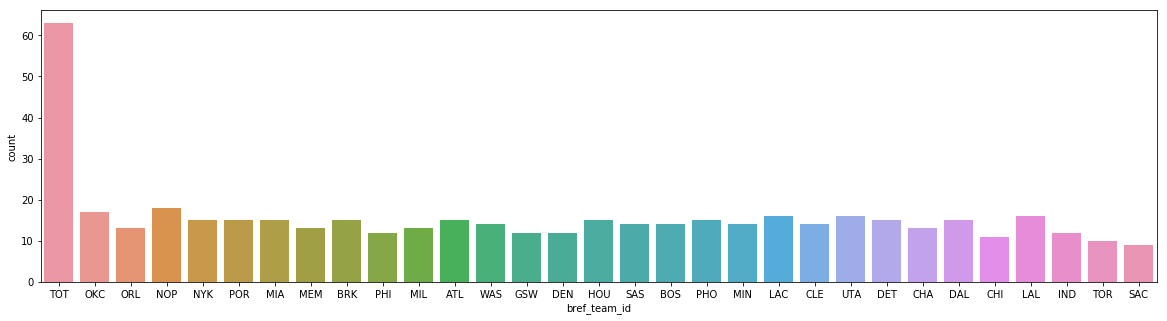

In [29]:
plt.figure(figsize = (20,5))
sns.countplot(x = nba['bref_team_id'], data = nba)

***It is interesting that there many players from the Team with Team ID == TOT. This might introduce a bias in training of the regression. Therefore, it needs checking. When checking the number of teams in NBA from http://stats.nba.com/teams/ under Team List Heading, and doing a simple count of the number of teams revealed there are only 30 teams. TOT is used when a player has represented more than one team in a season.And the values associated with that player's row are the combined stats(Refer: https://www.reddit.com/r/nba/comments/7lt7qz/what_does_tot_mean_on_basketballreferencecom/)***

***The value TOT is a valid value in this dataset***

In [30]:
nba['pos'].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [31]:
nba['pos'].nunique()

7

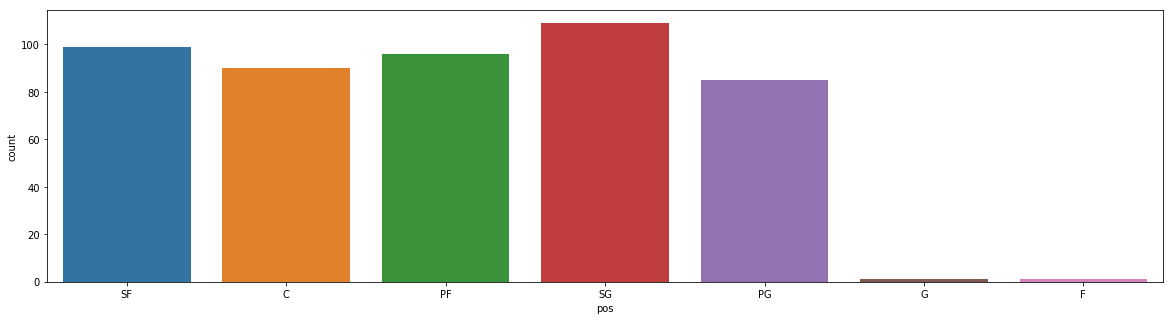

In [32]:
plt.figure(figsize = (20,5))
sns.countplot(x= nba['pos'], data = nba)

***There are very less number of players having positions == G, F. After reading about the player positions in basketball from https://www.myactivesg.com/sports/basketball/how-to-play/basketball-rules/basketball-positions-and-roles, I have identified that the G,F are invalid values ***

In [33]:
# Identify the players for whom these invalid values G and F
nba.loc[(nba['pos'].isin(['G','F'])),['player','pos']]

,player,pos
224,Damion James,G
356,Josh Powell,F


***Looking up for the position values for the players above in 'https://www.basketball-reference.com/leagues/NBA_2014_totals.html' which contains the above dataset(but slightly corrected), it can be seen that Damion James's Position was 'SF' and Josh Powell's Position was 'PF'.***

In [34]:
# Replace the invalid values with the ones mentioned above
nba['pos'].replace(to_replace ='G',value= 'SF',inplace=True)
nba['pos'].replace(to_replace ='F',value= 'PF',inplace=True)

In [35]:
# Check the players for whom these invalid values G and F
nba.loc[(nba['pos'].isin(['G','F'])),['player','pos']]

,player,pos


In [36]:
# Identify the players for whom these invalid values G and F
nba.loc[[224,356],['player','pos']]

,player,pos
224,Damion James,SF
356,Josh Powell,PF


***The replacement of the values was successful and the column is now clean***

In [37]:
nba['season'].unique()

array(['2013-2014'], dtype=object)

In [38]:
nba['season'].nunique()

1

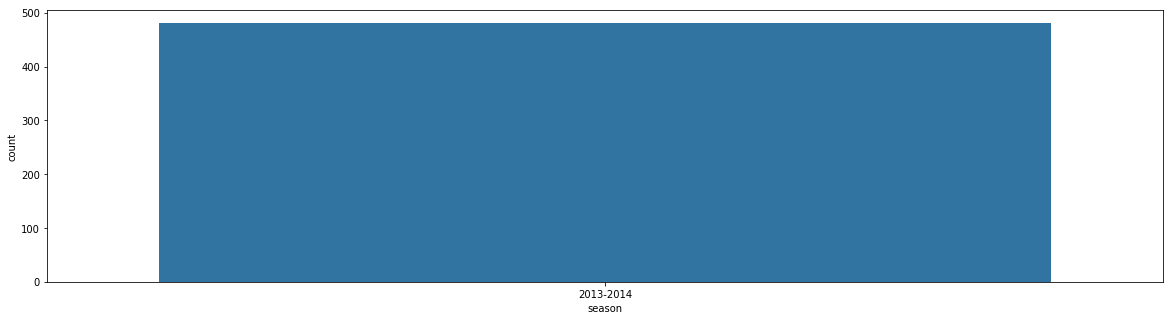

In [39]:
plt.figure(figsize = (20,5))
sns.countplot(x= nba['season'], data = nba)

**The season column has only one value and rightly so, as the data pertains to the season 2013-2014**

# Get Basic Statistical Information

In [40]:
print(nba.describe())

              age           g          gs           mp          fg  \
count  481.000000  481.000000  481.000000   481.000000  481.000000   
mean    26.509356   53.253638   25.571726  1237.386694  192.881497   
std      4.198265   25.322711   29.658465   897.258840  171.832793   
min     19.000000    1.000000    0.000000     1.000000    0.000000   
25%     23.000000   32.000000    0.000000   388.000000   47.000000   
50%     26.000000   61.000000   10.000000  1141.000000  146.000000   
75%     29.000000   76.000000   54.000000  2016.000000  307.000000   
max     39.000000   83.000000   82.000000  3122.000000  849.000000   

               fga         fg.         x3p        x3pa        x3p.  \
count   481.000000  481.000000  481.000000  481.000000  481.000000   
mean    424.463617    0.436268   39.613306  110.130977    0.288133   
std     368.850833    0.098509   50.855639  132.751732    0.157492   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%     110.000000 

In [41]:
nba.describe(include ='object')

,player,pos,bref_team_id,season
count,481,481,481,481
unique,481,5,31,1
top,Shabazz Muhammad,SG,TOT,2013-2014
freq,1,109,63,481


# Explore Data

## Uni-variate

### Uni-variate - Numerical columns

In [42]:
len(nba[num_cols].columns)

27

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCA4747E10>,
      dtype=object)

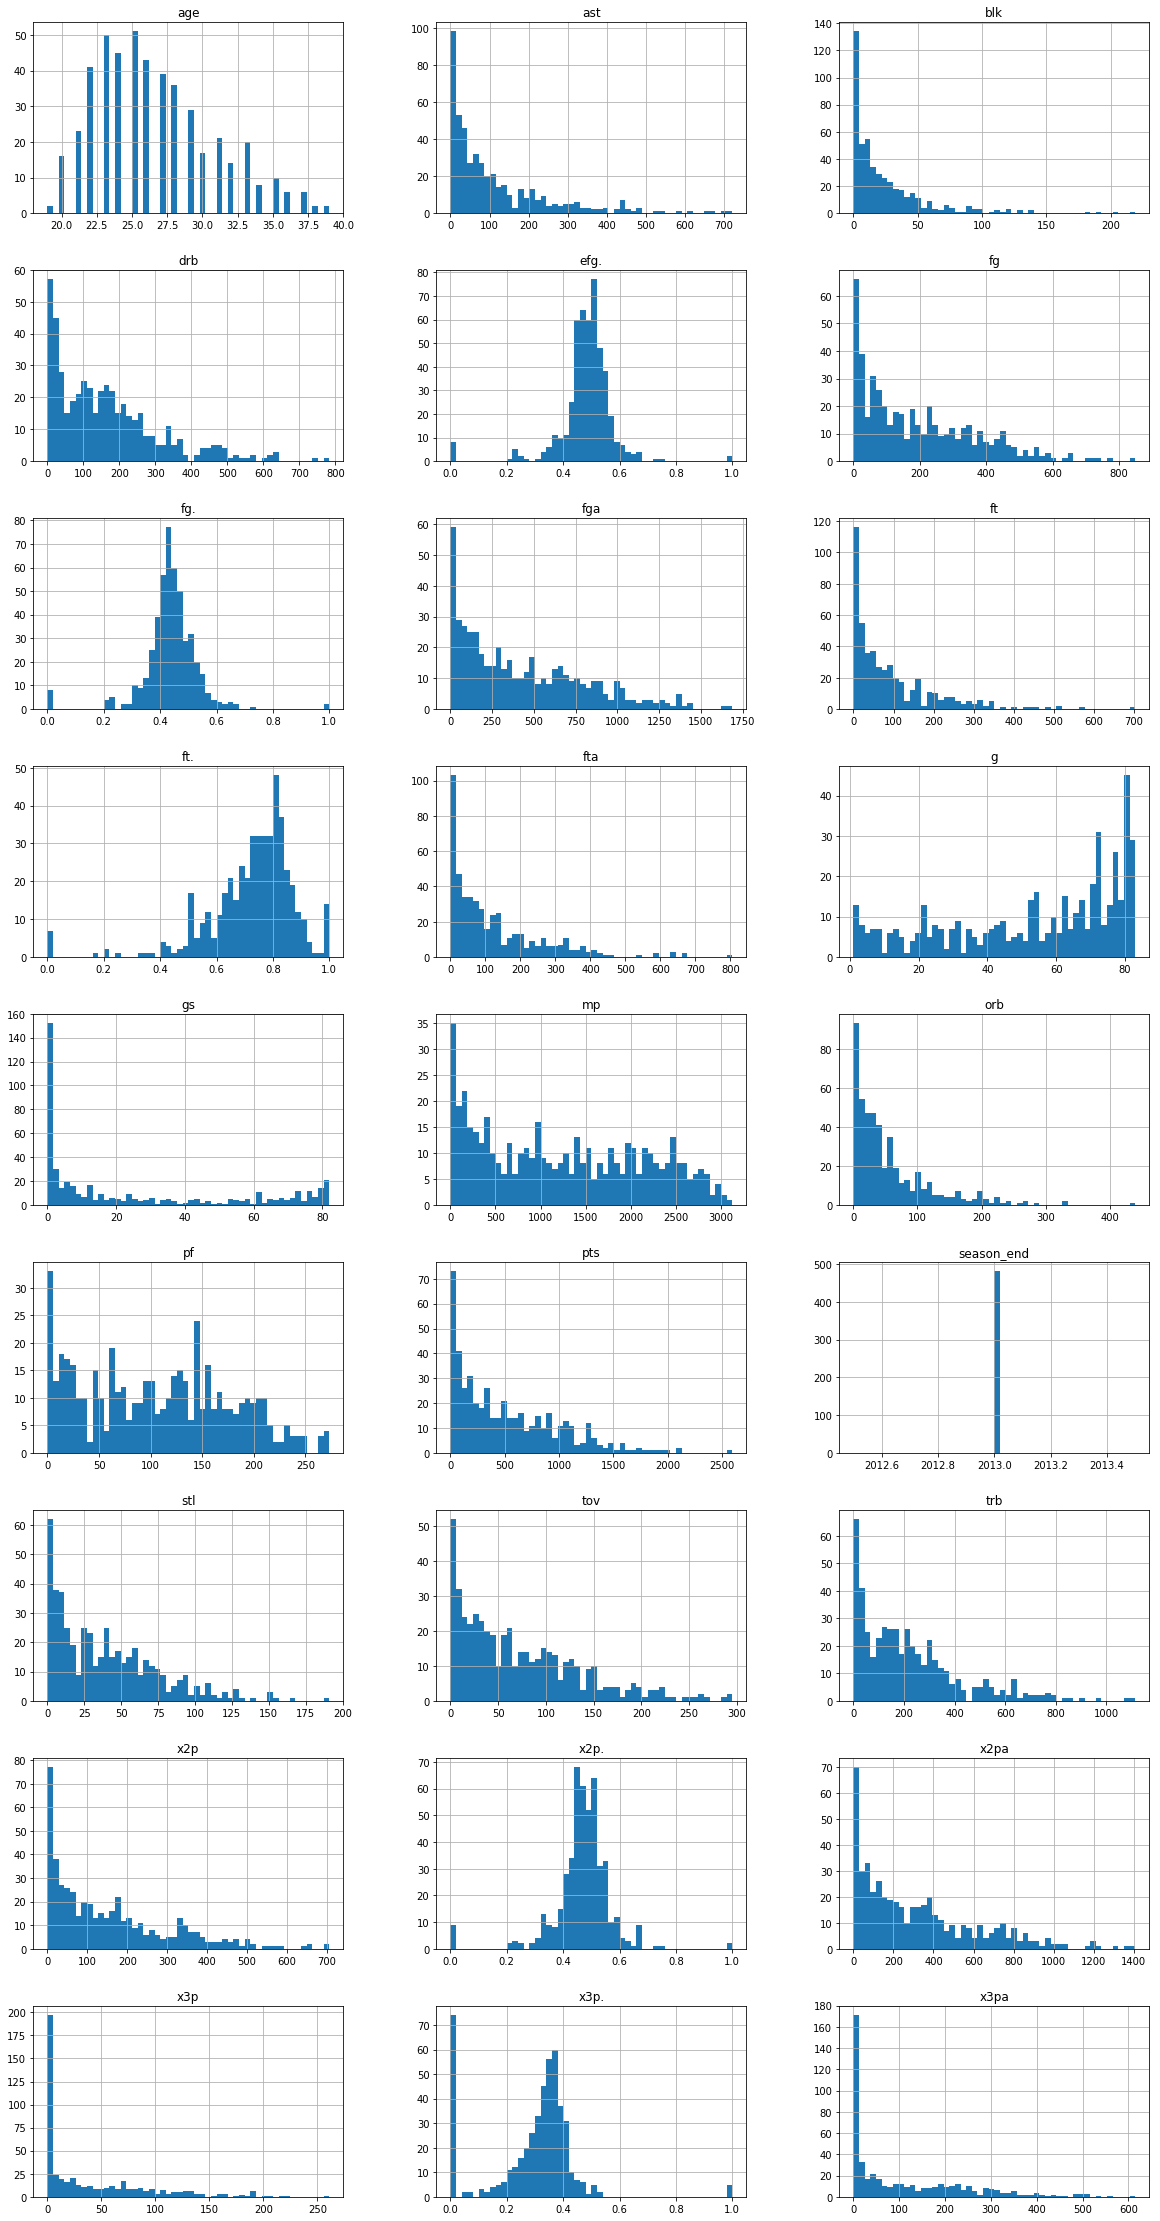

In [43]:
nba[num_cols].hist(bins=50,figsize=(20,40), layout= (9,3))

***It is interesting the note the majority of the columns have values which behave similar to exponential distribution***

***Also, the season_end columns has only one value repeated for every row***

### Uni-variate - Categorical Columns

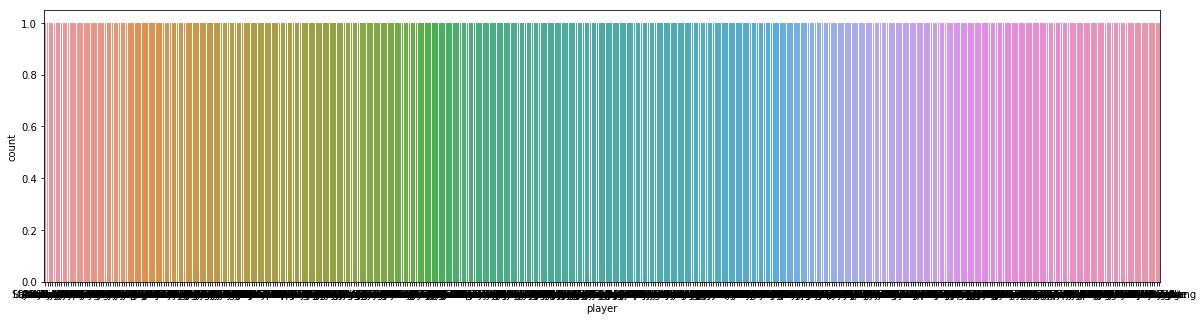

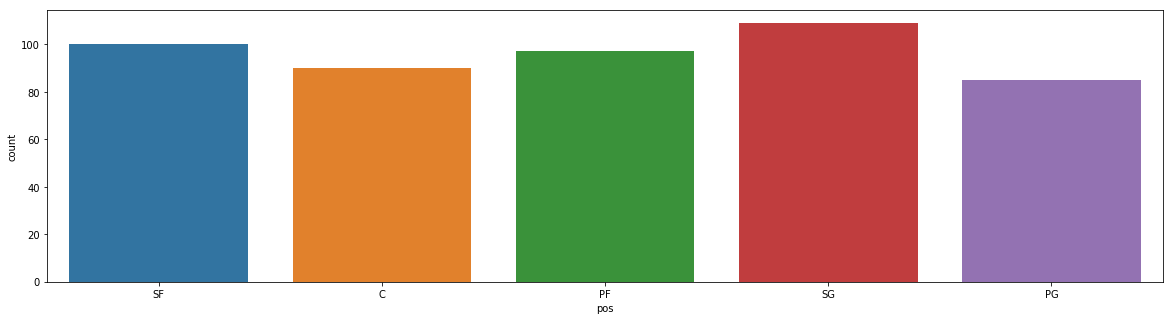

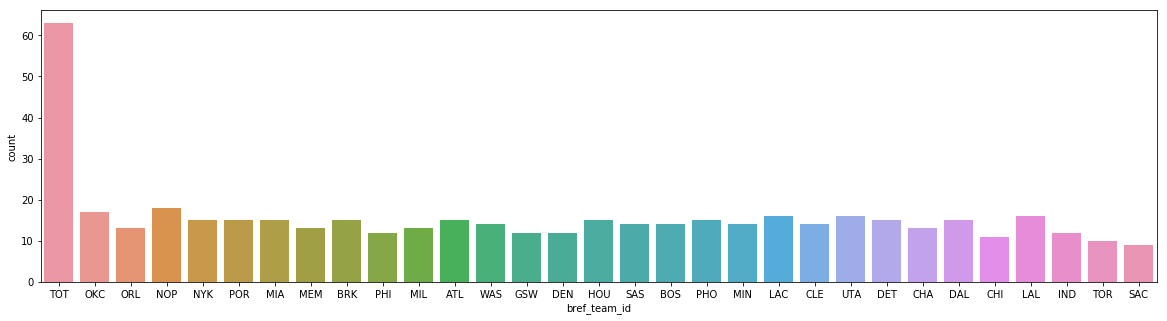

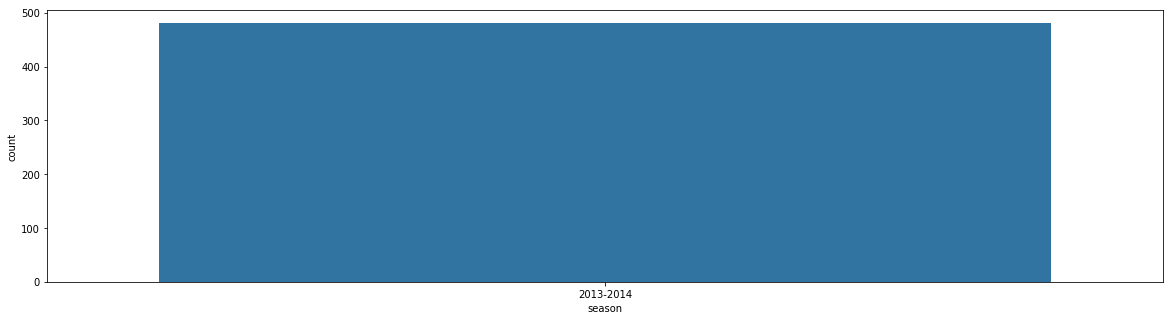

In [44]:
for i,col in enumerate(nba[cat_cols]):
    plt.figure(i,figsize = (20,5))
    sns.countplot(x=col, data=nba[cat_cols])
    print()

***It is expected that every name has the same count == 1, as no player name was repeated. Also, season column value for the year 2013-2014 is expected to be a constant for all values in that column. After all, it is a dataset for the year 2013-2014***

***However, it is interesting that there many players from the Team with Team ID == TOT. These players are players who played for more than one team in a season because of team transfers. It shows that there were 63 transfers in 2013 assuming every player transfered only one. The data however can't convey if a player had more than one team transfer in 2013.***

## Bi-variate

### Individual Numerical Columns vs pts

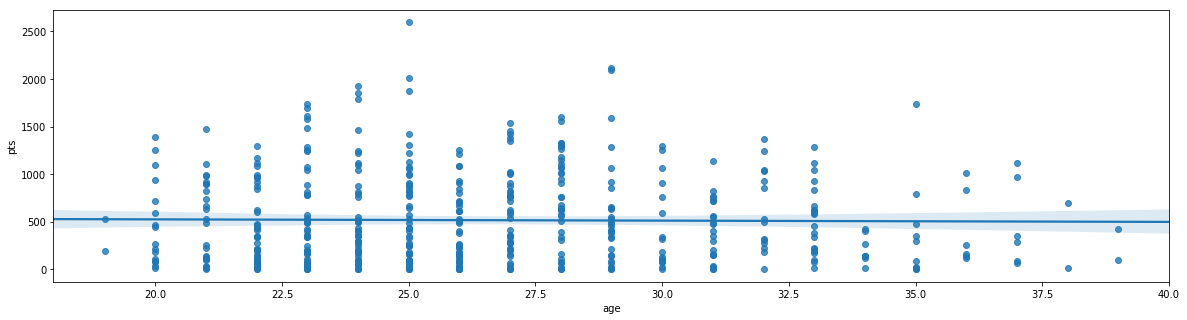

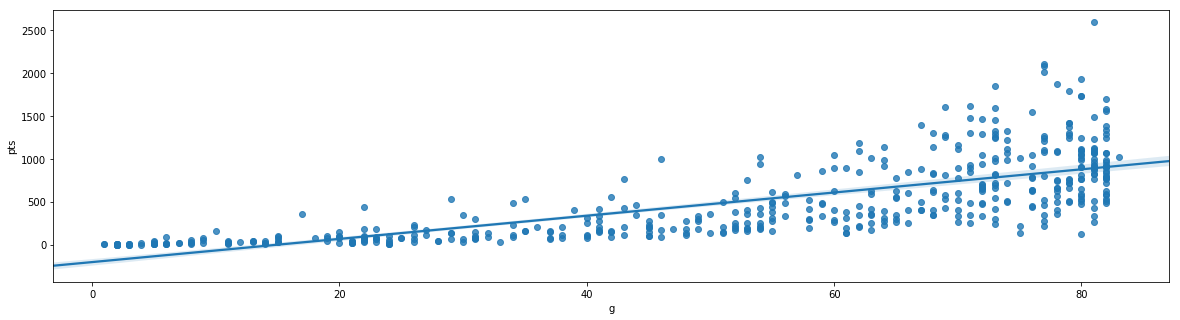

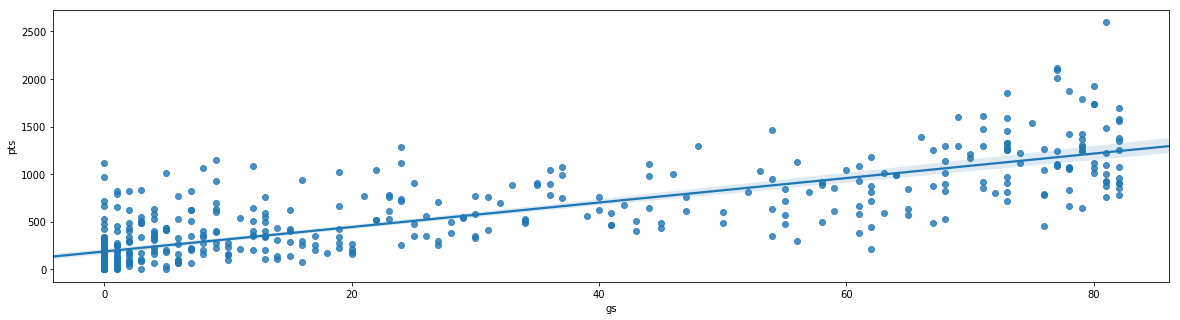

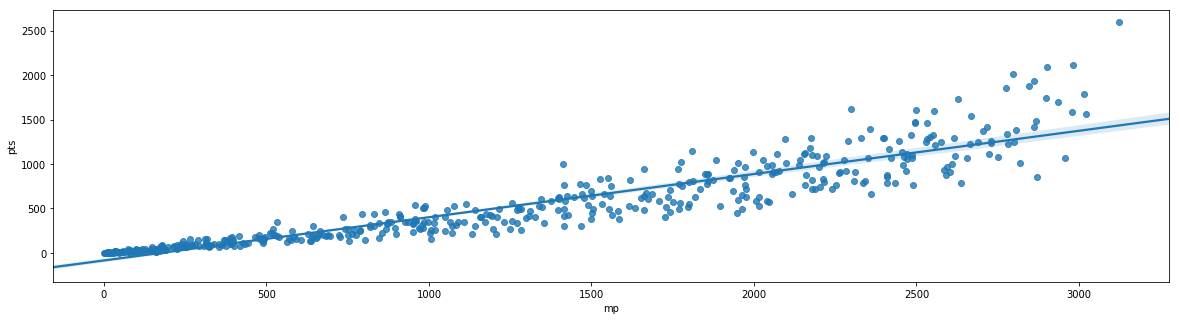

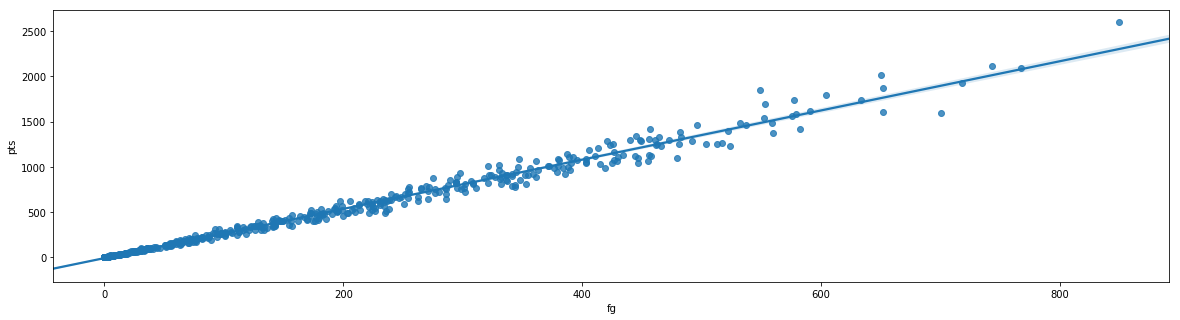

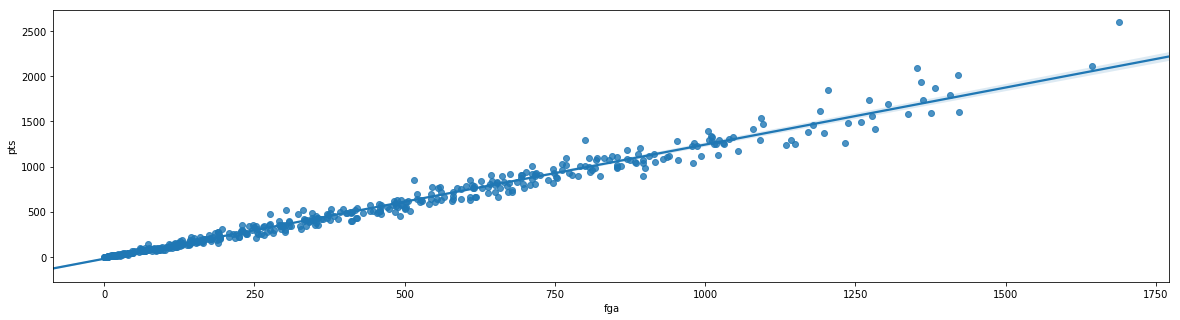

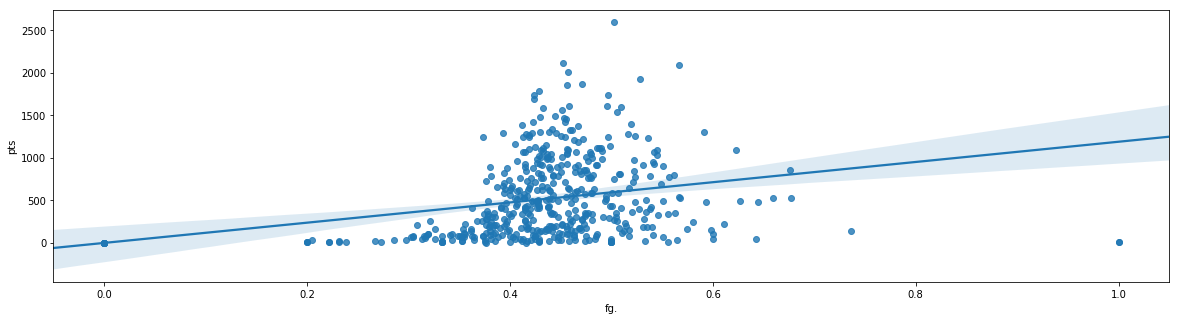

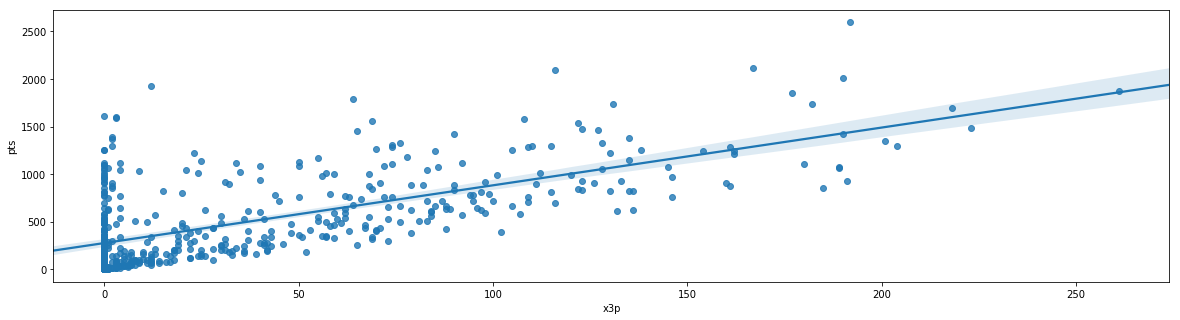

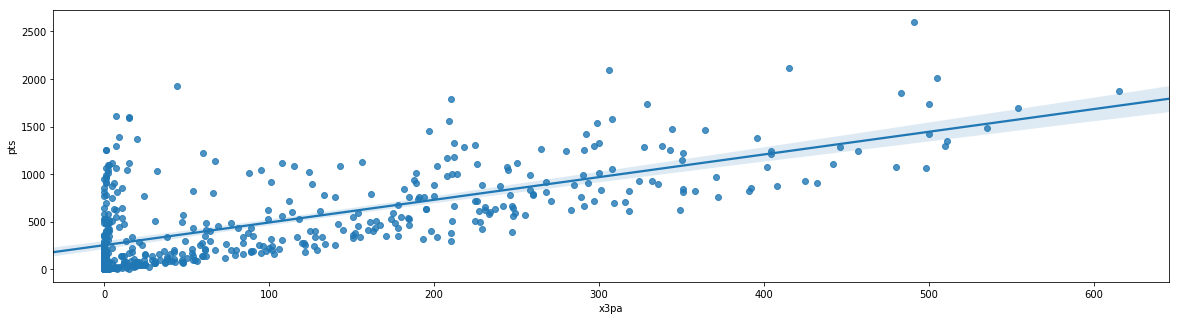

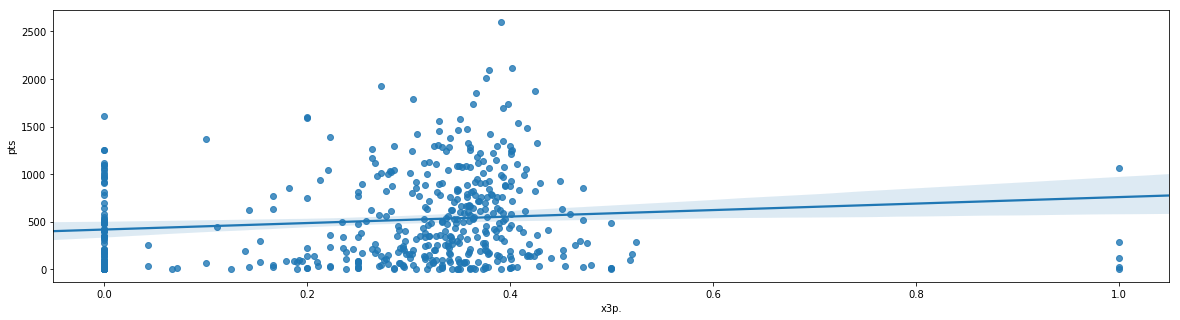

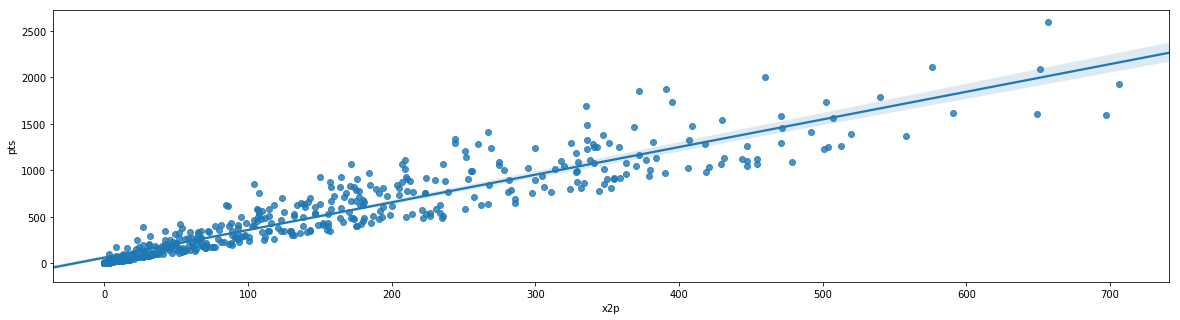

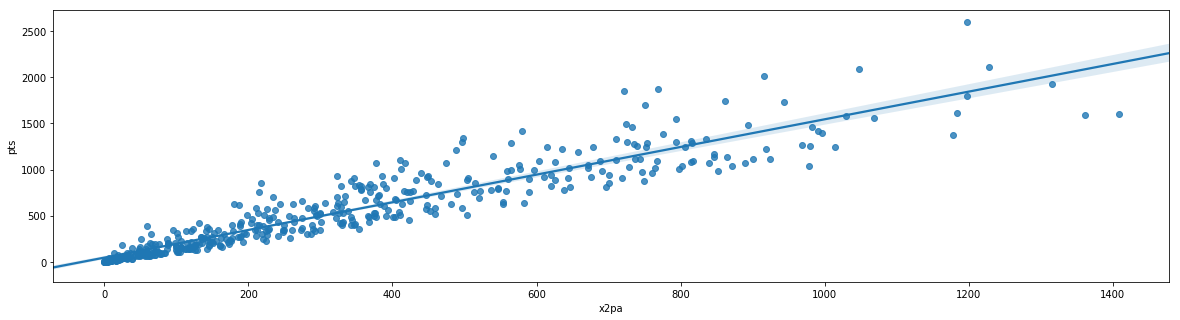

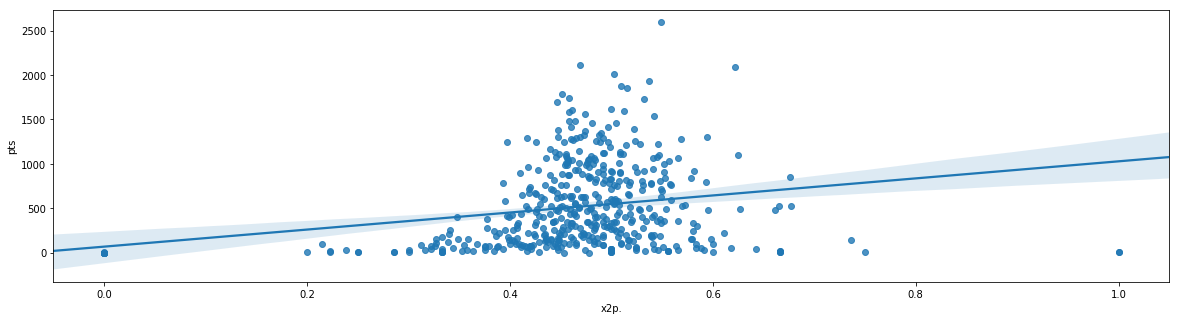

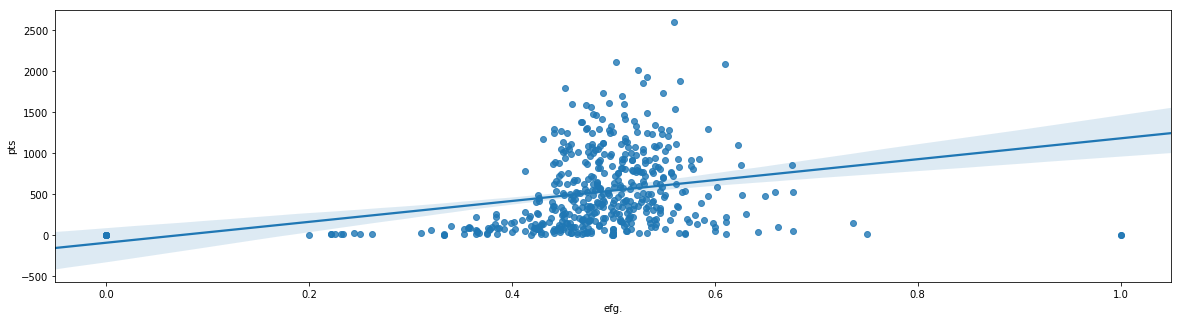

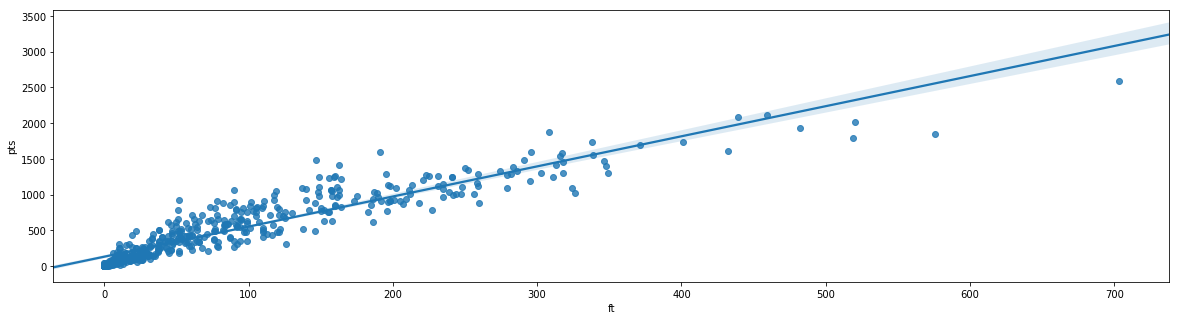

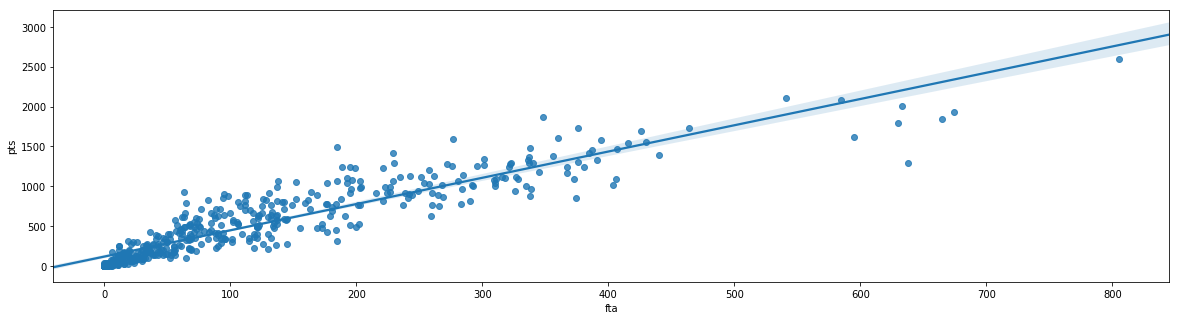

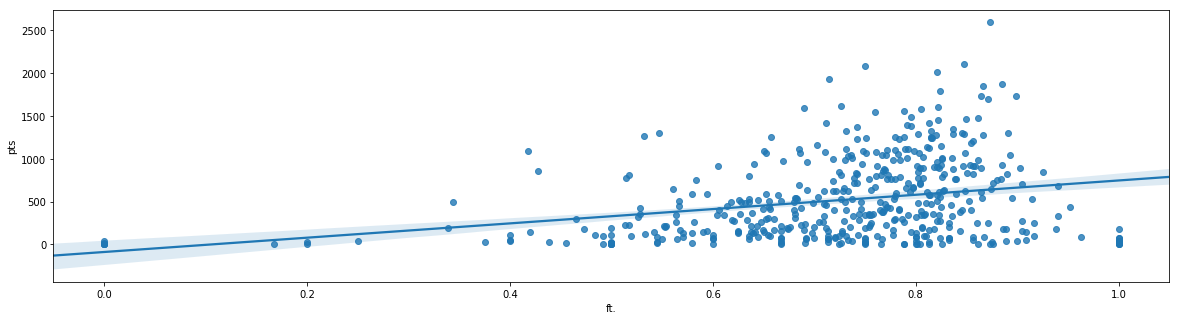

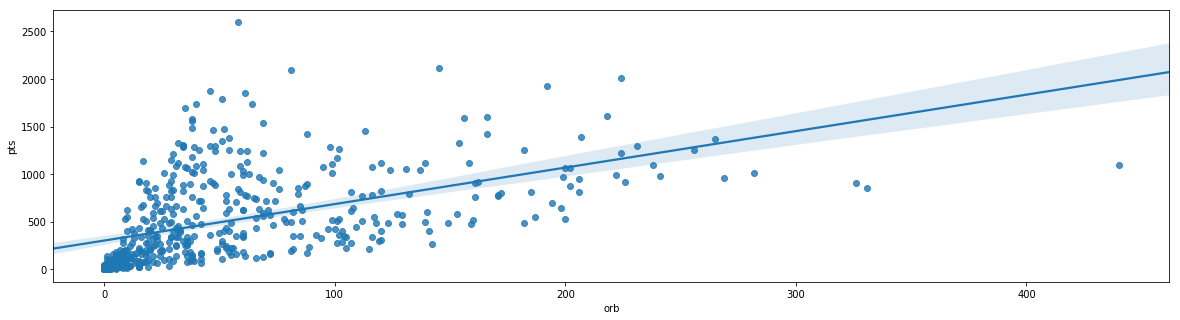

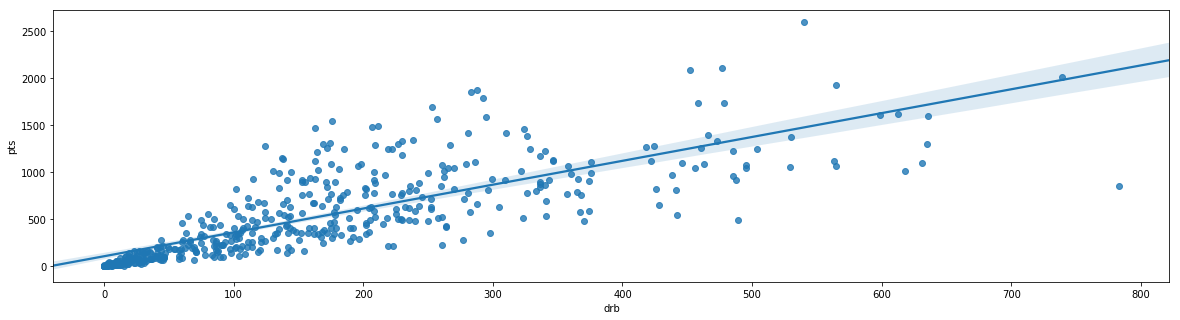

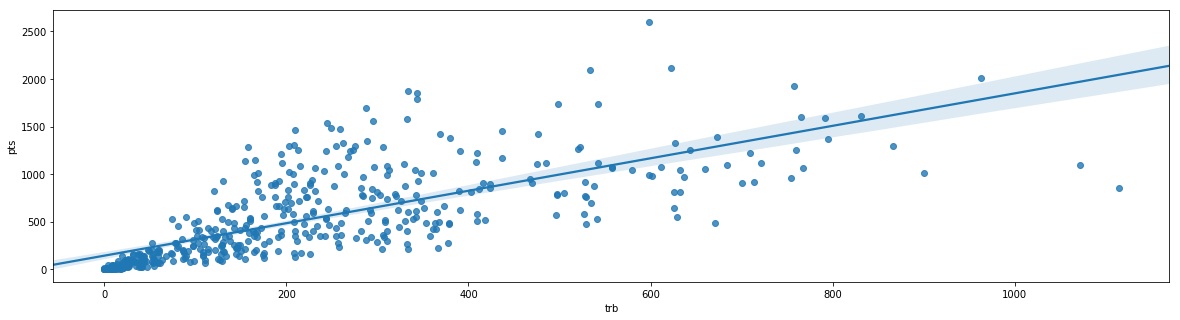

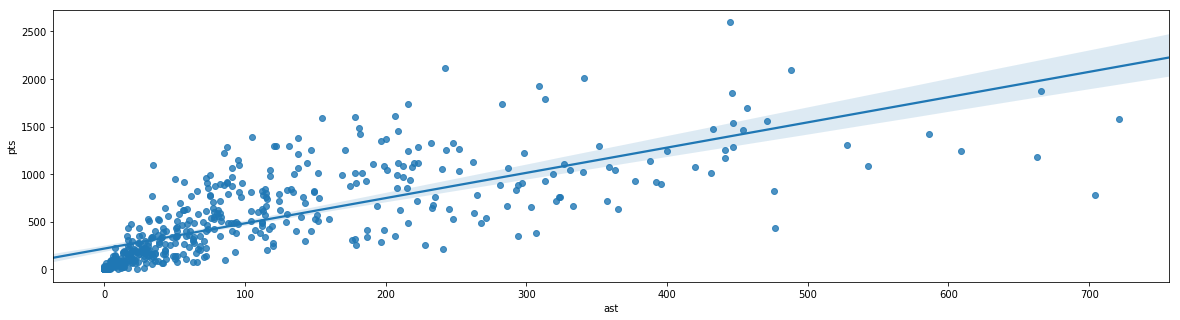

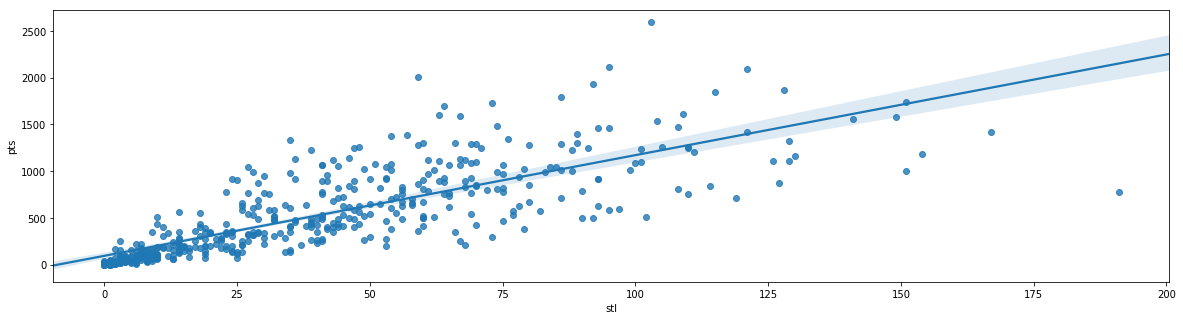

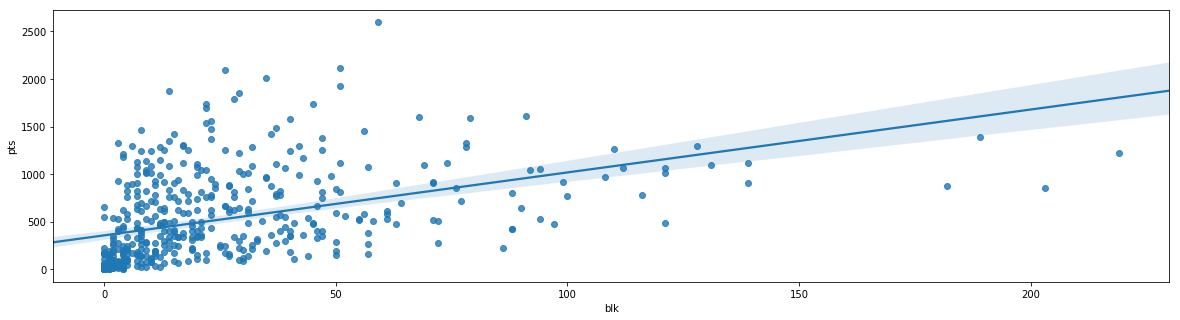

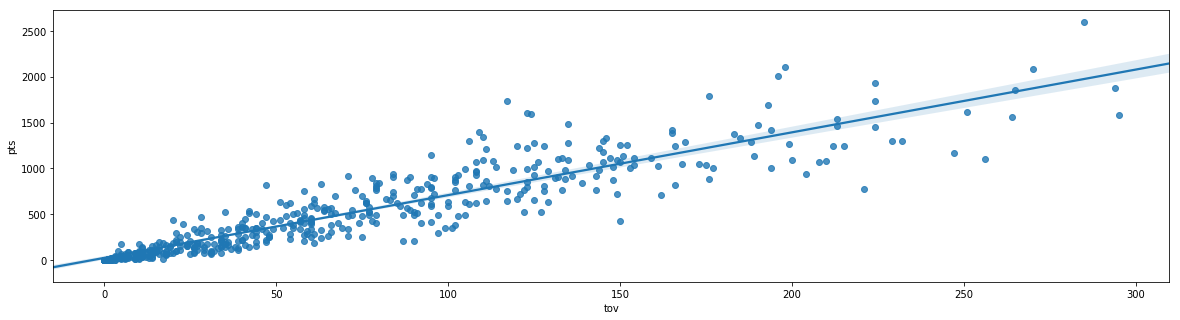

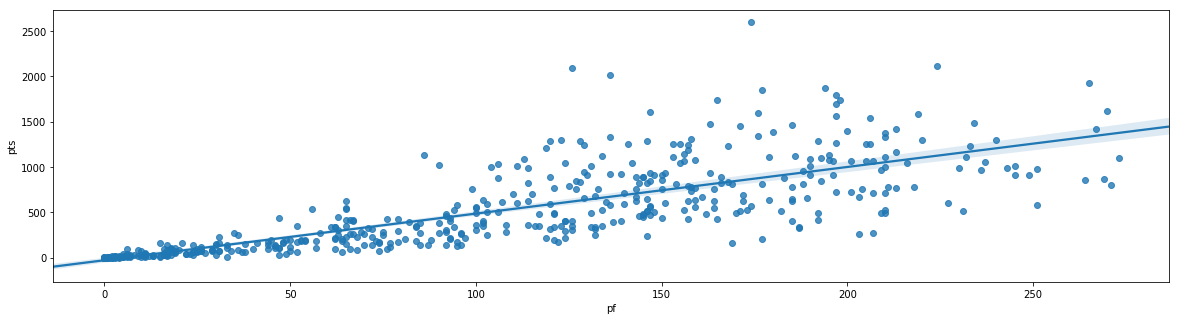

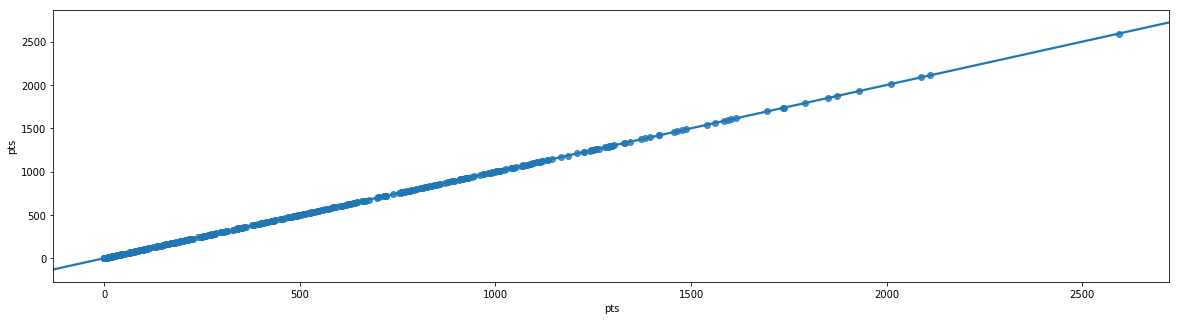

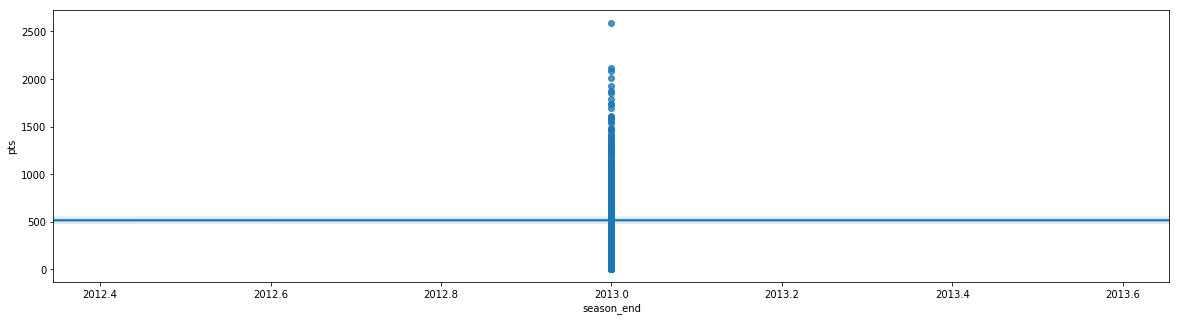

In [45]:
for i, col in enumerate(num_cols):
    plt.figure(i,figsize = (20,5))
    sns.regplot(x = col, y = 'pts', data = nba)

### Individual Categorical Columns vs pts

In [46]:
cat_cols

array(['player', 'pos', 'bref_team_id', 'season'], dtype=object)

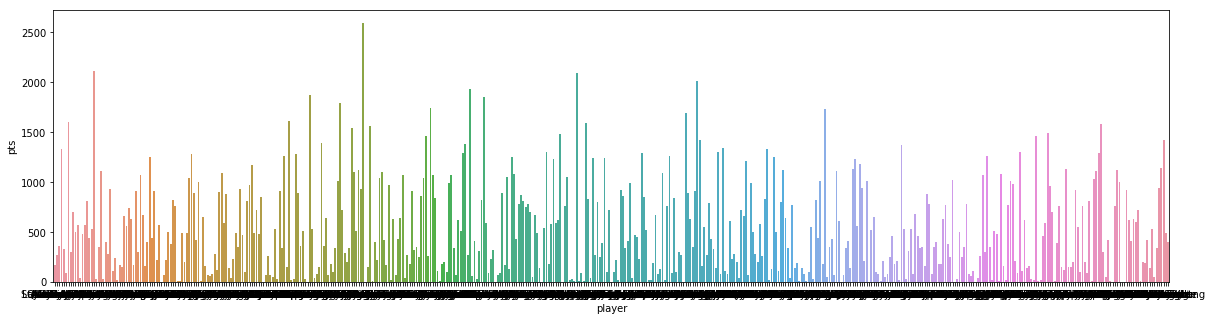

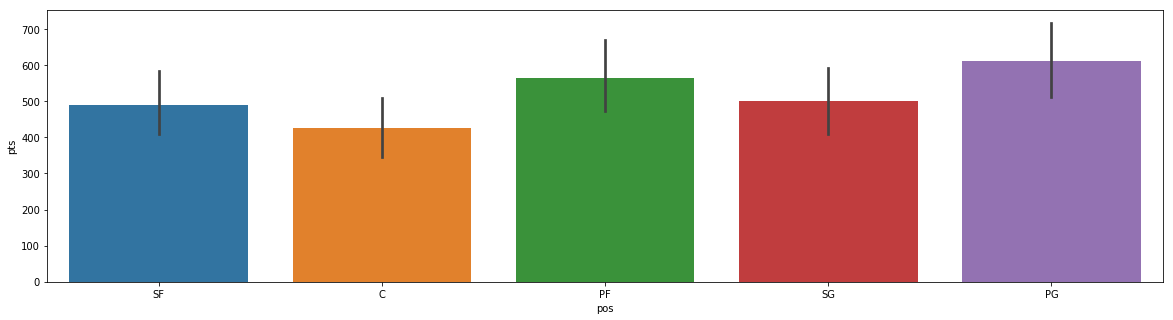

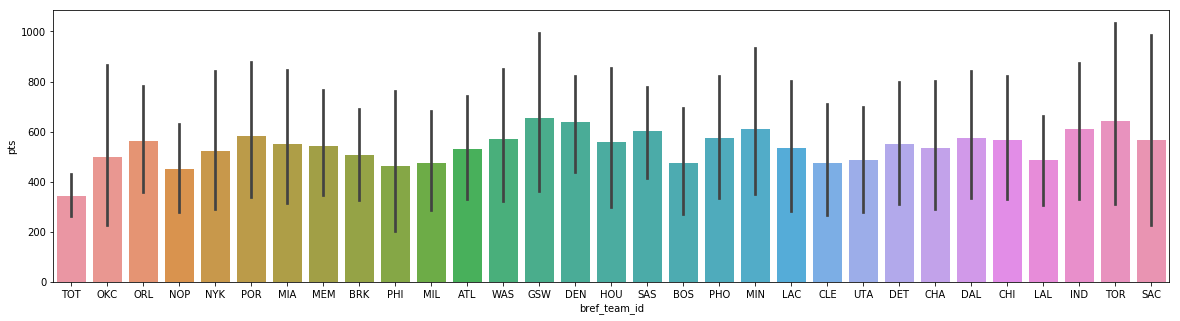

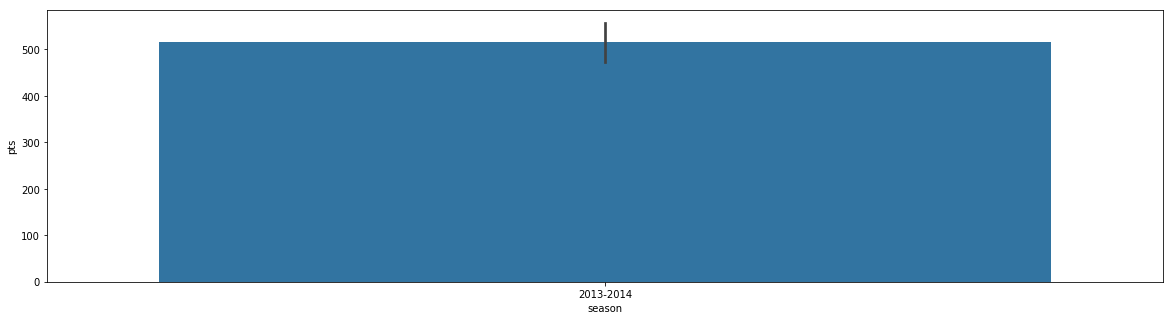

In [47]:
for i, col in enumerate(cat_cols):
    plt.figure(i,figsize = (20,5))
    sns.barplot(x = col,y ='pts', data=nba)

## Multi-variate

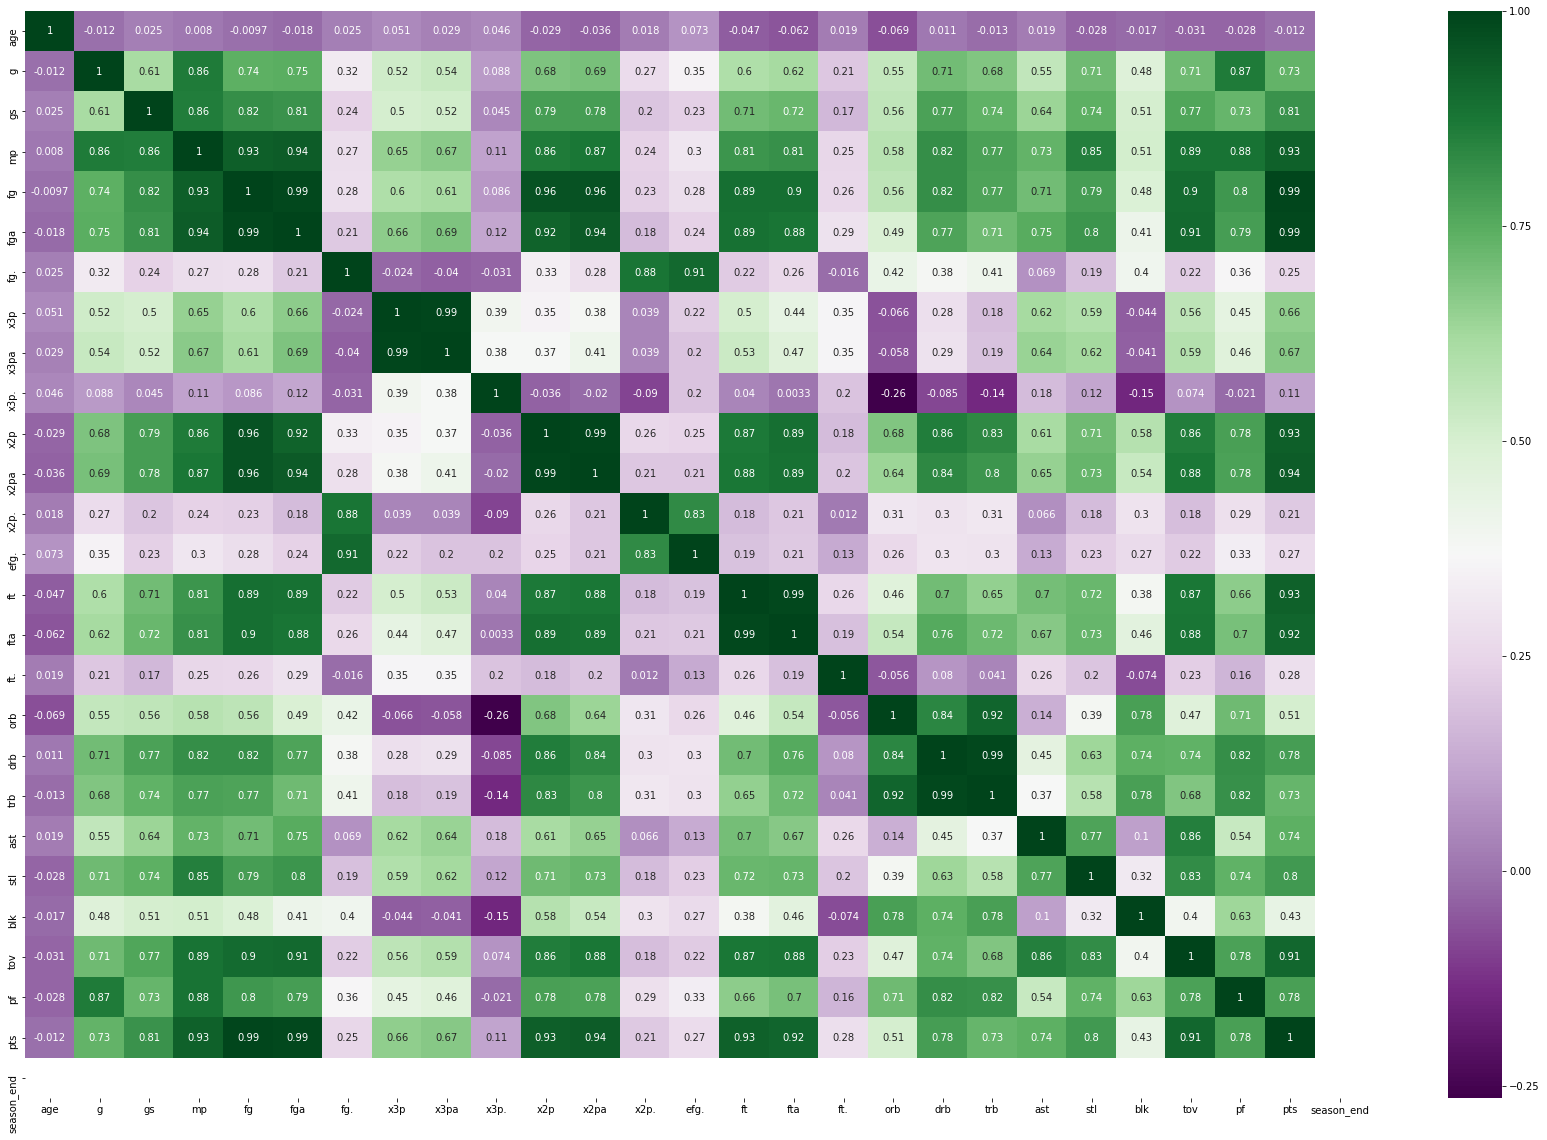

In [48]:
plt.figure(figsize=(30,20))
sns.heatmap(nba.corr(), annot = True, cmap= "PRGn")

In [49]:
nba.corr().iloc[-2:-1,:]

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
pts,-0.01191,0.728462,0.810294,0.927464,0.992041,0.989211,0.249419,0.655342,0.672076,0.113962,0.931493,0.937036,0.213475,0.269157,0.927618,0.918979,0.281958,0.505524,0.784675,0.72593,0.738295,0.797449,0.433549,0.912724,0.77806,1.0,NaN


In [50]:
print(nba.corr().iloc[-2:-1,:])

         age         g        gs        mp        fg       fga       fg.  \
pts -0.01191  0.728462  0.810294  0.927464  0.992041  0.989211  0.249419   

          x3p      x3pa      x3p.       x2p      x2pa      x2p.      efg.  \
pts  0.655342  0.672076  0.113962  0.931493  0.937036  0.213475  0.269157   

           ft       fta       ft.       orb       drb      trb       ast  \
pts  0.927618  0.918979  0.281958  0.505524  0.784675  0.72593  0.738295   

          stl       blk       tov       pf  pts  season_end  
pts  0.797449  0.433549  0.912724  0.77806  1.0         NaN  


***The points scored by a player in the season 2013-14 is:***
 - strongly correlated with
    - g -- Games played  
    - gs -- Games Started
    - mp -- Minutes Played
    - fg -- Field Goals
    - fga - Field Goal Attempts     
    - x2p -- 2-Point Field Goals
    - x2pa -- 2-point Field Goal Attempts
    - ft -- Free Throws
    - fta -- Free Throw Attempts
    - drb -- Defensive Rebounds
    - trb -- Total Rebounds  
	- ast -- Assists
    - stl -- Steals
    - tov -- Turnovers
    - pf -- Personal Fouls
    
 - moderately to strongly correlated with
    - x3p -- 3-Point Field Goals
    - x3pa -- 3-Point Field Goal Attempts

 

***It makes sense that all those columns which contribute towards calculation of making Points such as goals or attempts have strong positive correlation with points, along with Free Throws, Free Throw Attempts, Defensive Rebounds, Assists, Steals, Turnovers.***

***It is interesting to note that there is also a strong correlation of Points with Personal Fouls. Most likely, players end making fouls while seeking to make a goal. Since its a correlation, it might as well be incorrect or incomplete to make that connection.***

***Three pointers and its attempts are much less likely to play a bigger role in points considering that they are rarer than other goals and attemps listed above.***

# Engineer Features

In [51]:
print(num_cols)
print(cat_cols)

['age' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p' 'x3pa' 'x3p.' 'x2p' 'x2pa'
 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb' 'trb' 'ast' 'stl' 'blk' 'tov'
 'pf' 'pts' 'season_end']
['player' 'pos' 'bref_team_id' 'season']


## Encode Categorical Columns

In [52]:
to_encode = ['pos','bref_team_id']
prefixes = ['pos','team']
nba_encoded= pd.get_dummies(data = nba, prefix = prefixes, columns = to_encode, prefix_sep = '_', drop_first = True)

In [53]:
nba_encoded.columns

Index(['player', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
       'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'season', 'season_end',
       'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG', 'team_BOS', 'team_BRK',
       'team_CHA', 'team_CHI', 'team_CLE', 'team_DAL', 'team_DEN', 'team_DET',
       'team_GSW', 'team_HOU', 'team_IND', 'team_LAC', 'team_LAL', 'team_MEM',
       'team_MIA', 'team_MIL', 'team_MIN', 'team_NOP', 'team_NYK', 'team_OKC',
       'team_ORL', 'team_PHI', 'team_PHO', 'team_POR', 'team_SAC', 'team_SAS',
       'team_TOR', 'team_TOT', 'team_UTA', 'team_WAS'],
      dtype='object')

In [54]:
nba_encoded.drop(['player','season','season_end'], axis = 1,inplace = True)

In [55]:
nba_encoded_cols = nba_encoded.columns.values
nba_encoded_cols

array(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'pos_PF', 'pos_PG',
       'pos_SF', 'pos_SG', 'team_BOS', 'team_BRK', 'team_CHA', 'team_CHI',
       'team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GSW',
       'team_HOU', 'team_IND', 'team_LAC', 'team_LAL', 'team_MEM',
       'team_MIA', 'team_MIL', 'team_MIN', 'team_NOP', 'team_NYK',
       'team_OKC', 'team_ORL', 'team_PHI', 'team_PHO', 'team_POR',
       'team_SAC', 'team_SAS', 'team_TOR', 'team_TOT', 'team_UTA',
       'team_WAS'], dtype=object)

# Data Preprocessing - Normalization(MinMaxScaler)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
nba_scaled_array = scaler.fit_transform(nba_encoded)

In [57]:
nba_scaled = pd.DataFrame(data = nba_scaled_array, columns = nba_encoded_cols)

In [58]:
nba_scaled.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,pos_PF,pos_PG,pos_SF,pos_SG,team_BOS,team_BRK,team_CHA,team_CHI,team_CLE,team_DAL,team_DEN,team_DET,team_GSW,team_HOU,team_IND,team_LAC,team_LAL,team_MEM,team_MIA,team_MIL,team_MIN,team_NOP,team_NYK,team_OKC,team_ORL,team_PHI,team_PHO,team_POR,team_SAC,team_SAS,team_TOR,team_TOT,team_UTA,team_WAS
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,0.375468,0.637239,0.311850,0.396151,0.227187,0.251459,0.436268,0.151775,0.179075,0.288133,0.217094,0.223248,0.467357,0.480661,0.129738,0.149866,0.723842,0.126843,0.207940,0.196255,0.156084,0.205658,0.110064,0.243603,0.387799,0.199222,0.201663,0.176715,0.207900,0.226611,0.029106,0.031185,0.027027,0.022869,0.029106,0.031185,0.024948,0.031185,0.024948,0.031185,0.024948,0.033264,0.033264,0.027027,0.031185,0.027027,0.029106,0.037422,0.031185,0.035343,0.027027,0.024948,0.031185,0.031185,0.018711,0.029106,0.020790,0.130977,0.033264,0.029106
std,0.209913,0.308814,0.361689,0.287491,0.202394,0.218514,0.098509,0.194849,0.215856,0.157492,0.208531,0.208931,0.104521,0.099388,0.147465,0.163032,0.158851,0.141139,0.185630,0.179853,0.181719,0.182113,0.140983,0.212548,0.260856,0.181420,0.401660,0.381825,0.406228,0.419075,0.168279,0.173998,0.162331,0.149642,0.168279,0.173998,0.156129,0.173998,0.156129,0.173998,0.156129,0.179512,0.179512,0.162331,0.173998,0.162331,0.168279,0.189991,0.173998,0.184838,0.162331,0.156129,0.173998,0.173998,0.135644,0.168279,0.142829,0.337727,0.179512,0.168279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.378049,0.000000,0.123999,0.055359,0.065166,0.400000,0.000000,0.004878,0.238095,0.043909,0.047585,0.434783,0.451000,0.022760,0.027329,0.655000,0.027273,0.054917,0.049372,0.027739,0.047120,0.018265,0.071186,0.161172,0.044350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.350000,0.731707,0.121951,0.365268,0.171967,0.196682,0.437000,0.061303,0.078049,0.333333,0.155807,0.161222,0.474674,0.488000,0.075391,0.090683,0.754000,0.079545,0.172414,0.150808,0.090153,0.167539,0.063927,0.196610,0.380952,0.154647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.914634,0.658537,0.645626,0.361602,0.398104,0.479000,0.260536,0.313821,0.375000,0.325779,0.325994,0.513932,0.525000,0.179232,0.222360,0.821000,0.165909,0.293742,0.278276,0.210818,0.314136,0.146119,0

# Generate Input Vector X and Output Y, and Split the Data for Training and Testing

In [59]:
X = nba_scaled.drop('pts', axis = 1)
Y = nba_scaled['pts']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

# Fit the Base Models and Collect the Metrics

## Distance Metric = Euclidean Distance

In [61]:
k_values =[]
r2_train_values =[]
r2_test_values =[]
rmse_train_values = []
rmse_test_values =[]
accuracy_test =[]
accuracy_train =[]

import math

for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto')
    model = knn.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    k_values.append(k)
    r2_train_values.append(metrics.r2_score(model.predict(x_train), y_train))
    r2_test_values.append(metrics.r2_score(model.predict(x_test), y_test))
    rmse_train_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x_train), y_train)))
    rmse_test_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x_test), y_test)))
    accuracy_train.append(model.score(x_train, y_train))
    accuracy_test.append(model.score(x_test, y_test))

    print("The RMSE is ", math.sqrt(metrics.mean_squared_error(model.predict(x_test), y_test)),"for K-Value:",k)

The RMSE is  0.09328325164557479 for K-Value: 1
The RMSE is  0.07958230380770048 for K-Value: 2
The RMSE is  0.07064149288361922 for K-Value: 3
The RMSE is  0.06496114162623902 for K-Value: 4
The RMSE is  0.06494487558825487 for K-Value: 5
The RMSE is  0.06332690434300124 for K-Value: 6
The RMSE is  0.06106031585626003 for K-Value: 7
The RMSE is  0.060272290243044986 for K-Value: 8
The RMSE is  0.060248216273884145 for K-Value: 9
The RMSE is  0.06075567177310226 for K-Value: 10
The RMSE is  0.06237530600858909 for K-Value: 11
The RMSE is  0.06290579721361483 for K-Value: 12
The RMSE is  0.0630284970520288 for K-Value: 13
The RMSE is  0.06473505418085979 for K-Value: 14
The RMSE is  0.06442919980375202 for K-Value: 15
The RMSE is  0.0643003195182406 for K-Value: 16
The RMSE is  0.06485151603769138 for K-Value: 17
The RMSE is  0.06525561257804281 for K-Value: 18
The RMSE is  0.06460183420889477 for K-Value: 19
The RMSE is  0.0649472738270702 for K-Value: 20
The RMSE is  0.064649327399728

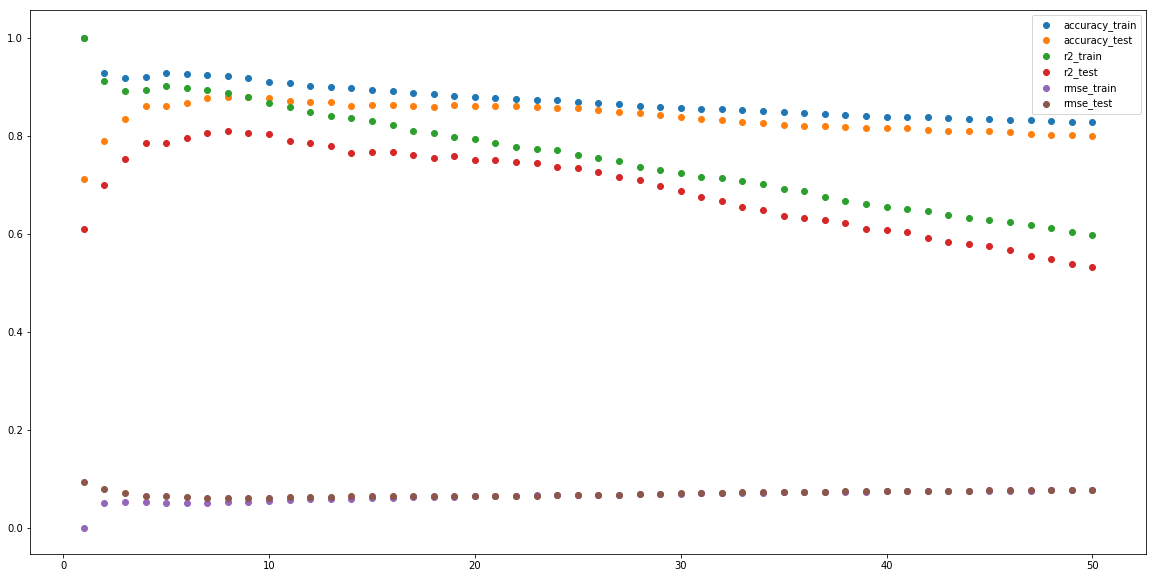

In [62]:
plt.figure(figsize = (20,10))

plt.scatter(k_values, accuracy_train, label = 'accuracy_train')
plt.scatter(k_values, accuracy_test, label = 'accuracy_test')

plt.scatter(k_values, r2_train_values, label = 'r2_train')
plt.scatter(k_values, r2_test_values, label = 'r2_test')

plt.scatter(k_values, rmse_train_values, label = 'rmse_train')
plt.scatter(k_values, rmse_test_values, label = 'rmse_test')

plt.legend()
plt.show()
     

## Distance Metric = Manhattan Distance  

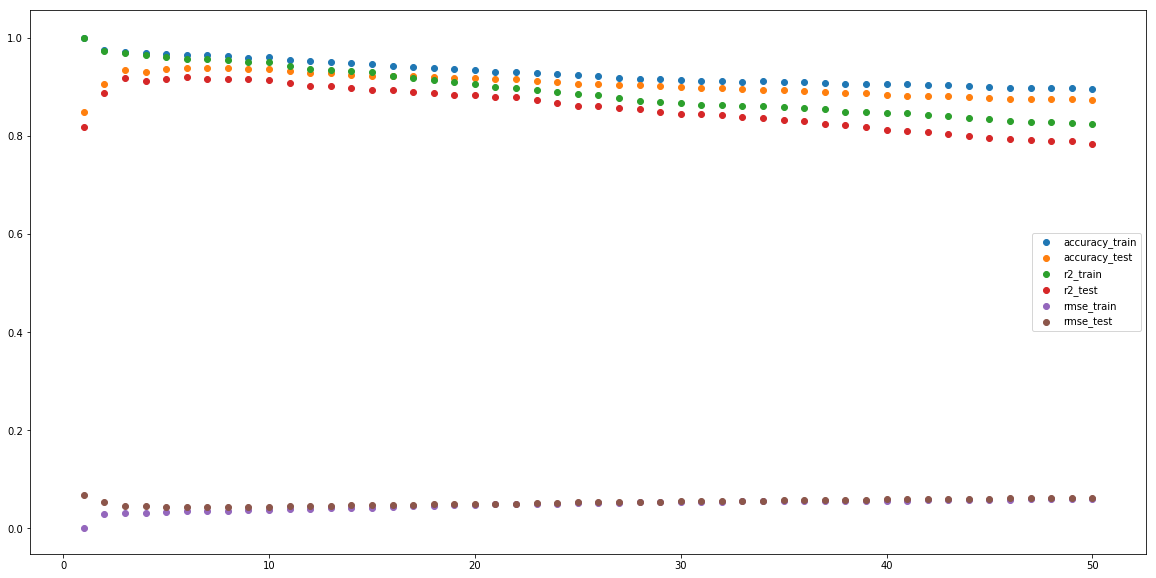

In [63]:

k_values =[]
r2_train_values =[]
r2_test_values =[]
rmse_train_values = []
rmse_test_values =[]
accuracy_test =[]
accuracy_train =[]

import math

for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto',p=1)
    model = knn.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    k_values.append(k)
    r2_train_values.append(metrics.r2_score(model.predict(x_train), y_train))
    r2_test_values.append(metrics.r2_score(model.predict(x_test), y_test))
    rmse_train_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x_train), y_train)))
    rmse_test_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x_test), y_test)))
    accuracy_train.append(model.score(x_train, y_train))
    accuracy_test.append(model.score(x_test, y_test))
    
    
plt.figure(figsize = (20,10))

plt.scatter(k_values, accuracy_train, label = 'accuracy_train')
plt.scatter(k_values, accuracy_test, label = 'accuracy_test')

plt.scatter(k_values, r2_train_values, label = 'r2_train')
plt.scatter(k_values, r2_test_values, label = 'r2_test')

plt.scatter(k_values, rmse_train_values, label = 'rmse_train')
plt.scatter(k_values, rmse_test_values, label = 'rmse_test')

plt.legend()
plt.show()
     

## Distance Metric = Minkowski Distance

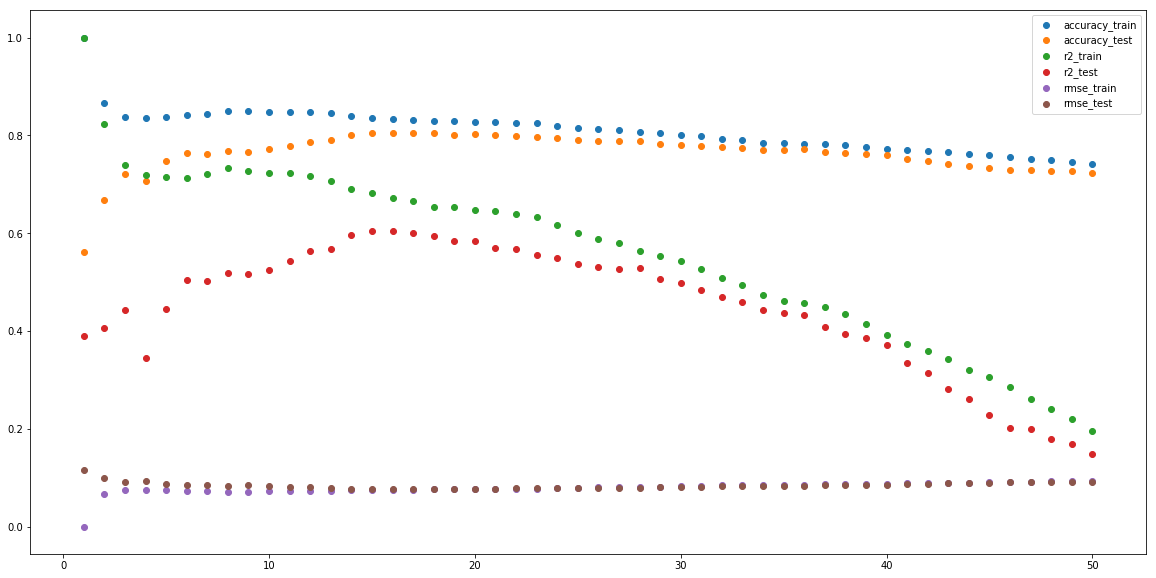

In [64]:
k_values =[]
r2_train_values =[]
r2_test_values =[]
rmse_train_values = []
rmse_test_values =[]
accuracy_test =[]
accuracy_train =[]

import math

for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto', p = 3)
    model = knn.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    k_values.append(k)
    r2_train_values.append(metrics.r2_score(model.predict(x_train), y_train))
    r2_test_values.append(metrics.r2_score(model.predict(x_test), y_test))
    rmse_train_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x_train), y_train)))
    rmse_test_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x_test), y_test)))
    accuracy_train.append(model.score(x_train, y_train))
    accuracy_test.append(model.score(x_test, y_test))

    
plt.figure(figsize = (20,10))

plt.scatter(k_values, accuracy_train, label = 'accuracy_train')
plt.scatter(k_values, accuracy_test, label = 'accuracy_test')

plt.scatter(k_values, r2_train_values, label = 'r2_train')
plt.scatter(k_values, r2_test_values, label = 'r2_test')

plt.scatter(k_values, rmse_train_values, label = 'rmse_train')
plt.scatter(k_values, rmse_test_values, label = 'rmse_test')

plt.legend()
plt.show()

# Select Features

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text xticklabel objects>)

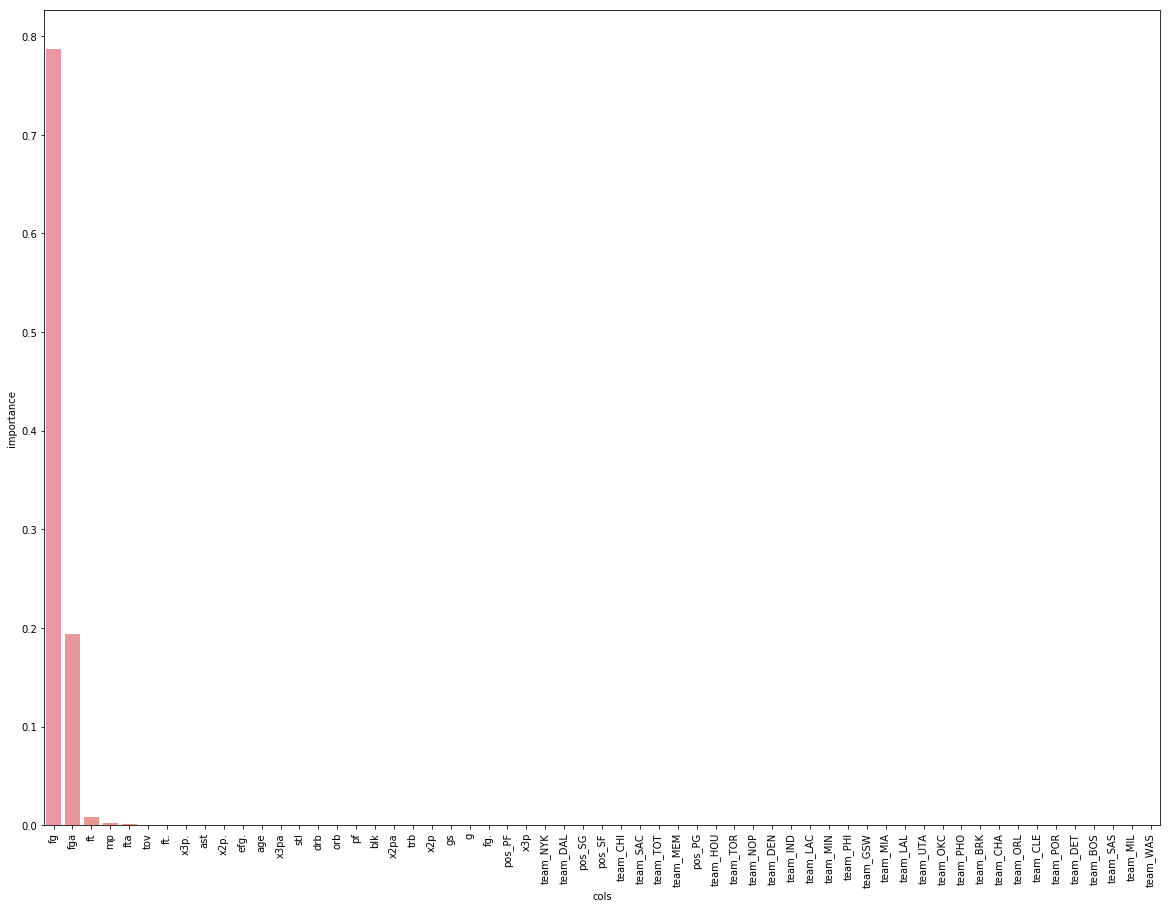

In [65]:
from sklearn.ensemble import RandomForestRegressor
rndf = RandomForestRegressor(n_estimators=150)
rndf.fit(x_train, y_train)
importance = pd.DataFrame.from_dict({'cols':x_train.columns, 'importance': rndf.feature_importances_})
importance = importance.sort_values(by='importance', ascending=False)
plt.figure(figsize=(20,15))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

In [66]:
imp_cols = importance[importance.importance > 0.0005].cols.values
imp_cols

array(['fg', 'fga', 'ft', 'mp', 'fta', 'tov', 'ft.', 'x3p.'], dtype=object)

In [67]:
x1_train,x1_test, y1_train, y1_test = train_test_split(X[imp_cols],Y,test_size=0.3,random_state =100)

# Fit Features Selected Model and Collect the Metrics

## Distance Metric = Euclidean Distance

In [68]:
k_values =[]
r2_train1_values =[]
r2_test1_values =[]
rmse_train1_values = []
rmse_test1_values =[]
accuracy_test1 =[]
accuracy_train1 =[]


import math

for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto')
    model = knn.fit(x1_train, y1_train) 
    y_pred1 = model.predict(x1_test)
    k_values.append(k)
    r2_train1_values.append(metrics.r2_score(model.predict(x1_train), y1_train))
    r2_test1_values.append(metrics.r2_score(model.predict(x1_test), y1_test))
    rmse_train1_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x1_train), y1_train)))
    rmse_test1_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x1_test), y1_test)))
    accuracy_train1.append(model.score(x1_train, y1_train))
    accuracy_test1.append(model.score(x1_test, y1_test))

    print("The RMSE is ", math.sqrt(metrics.mean_squared_error(model.predict(x1_test), y1_test)),"for K-Value:",k)

The RMSE is  0.035719770508819436 for K-Value: 1
The RMSE is  0.03386038882288293 for K-Value: 2
The RMSE is  0.03122515625156197 for K-Value: 3
The RMSE is  0.030045767445075706 for K-Value: 4
The RMSE is  0.028748223256685614 for K-Value: 5
The RMSE is  0.028940366823365638 for K-Value: 6
The RMSE is  0.029863155891328458 for K-Value: 7
The RMSE is  0.030960553955416793 for K-Value: 8
The RMSE is  0.03114177164973951 for K-Value: 9
The RMSE is  0.03127458675672264 for K-Value: 10
The RMSE is  0.03145843278238127 for K-Value: 11
The RMSE is  0.03298833327944607 for K-Value: 12
The RMSE is  0.033727477000736354 for K-Value: 13
The RMSE is  0.0346989926491804 for K-Value: 14
The RMSE is  0.0354762217576303 for K-Value: 15
The RMSE is  0.03532540579921286 for K-Value: 16
The RMSE is  0.035812774259856676 for K-Value: 17
The RMSE is  0.03647224446235309 for K-Value: 18
The RMSE is  0.036955975160448115 for K-Value: 19
The RMSE is  0.037234383080175015 for K-Value: 20
The RMSE is  0.037795

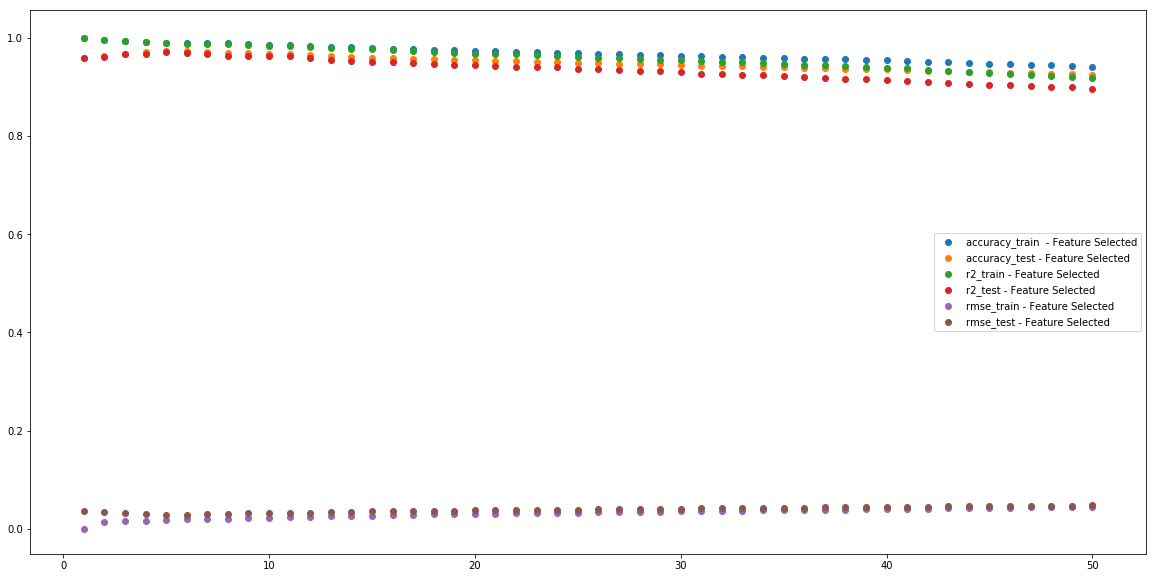

In [69]:
plt.figure(figsize = (20,10))

plt.scatter(k_values, accuracy_train1, label = 'accuracy_train  - Feature Selected')
plt.scatter(k_values, accuracy_test1, label = 'accuracy_test - Feature Selected')

plt.scatter(k_values, r2_train1_values, label = 'r2_train - Feature Selected')
plt.scatter(k_values, r2_test1_values, label = 'r2_test - Feature Selected')

plt.scatter(k_values, rmse_train1_values, label = 'rmse_train - Feature Selected')
plt.scatter(k_values, rmse_test1_values, label = 'rmse_test - Feature Selected')

plt.legend()
plt.show()

## Distance metric = Manhattan Distance

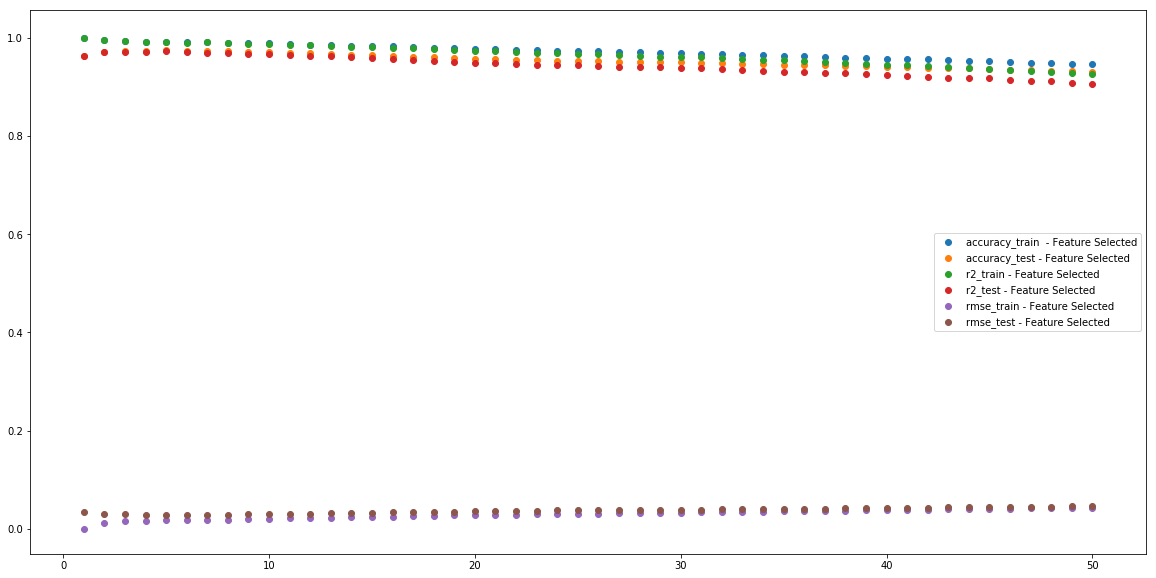

In [70]:
k_values =[]
r2_train1_values =[]
r2_test1_values =[]
rmse_train1_values = []
rmse_test1_values =[]
accuracy_test1 =[]
accuracy_train1 =[]


import math

for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto', p =1)
    model = knn.fit(x1_train, y1_train) 
    y_pred1 = model.predict(x1_test)
    k_values.append(k)
    r2_train1_values.append(metrics.r2_score(model.predict(x1_train), y1_train))
    r2_test1_values.append(metrics.r2_score(model.predict(x1_test), y1_test))
    rmse_train1_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x1_train), y1_train)))
    rmse_test1_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x1_test), y1_test)))
    accuracy_train1.append(model.score(x1_train, y1_train))
    accuracy_test1.append(model.score(x1_test, y1_test))

plt.figure(figsize = (20,10))

plt.scatter(k_values, accuracy_train1, label = 'accuracy_train  - Feature Selected')
plt.scatter(k_values, accuracy_test1, label = 'accuracy_test - Feature Selected')

plt.scatter(k_values, r2_train1_values, label = 'r2_train - Feature Selected')
plt.scatter(k_values, r2_test1_values, label = 'r2_test - Feature Selected')

plt.scatter(k_values, rmse_train1_values, label = 'rmse_train - Feature Selected')
plt.scatter(k_values, rmse_test1_values, label = 'rmse_test - Feature Selected')

plt.legend()
plt.show()

## Distance metric = Minkowski Distance

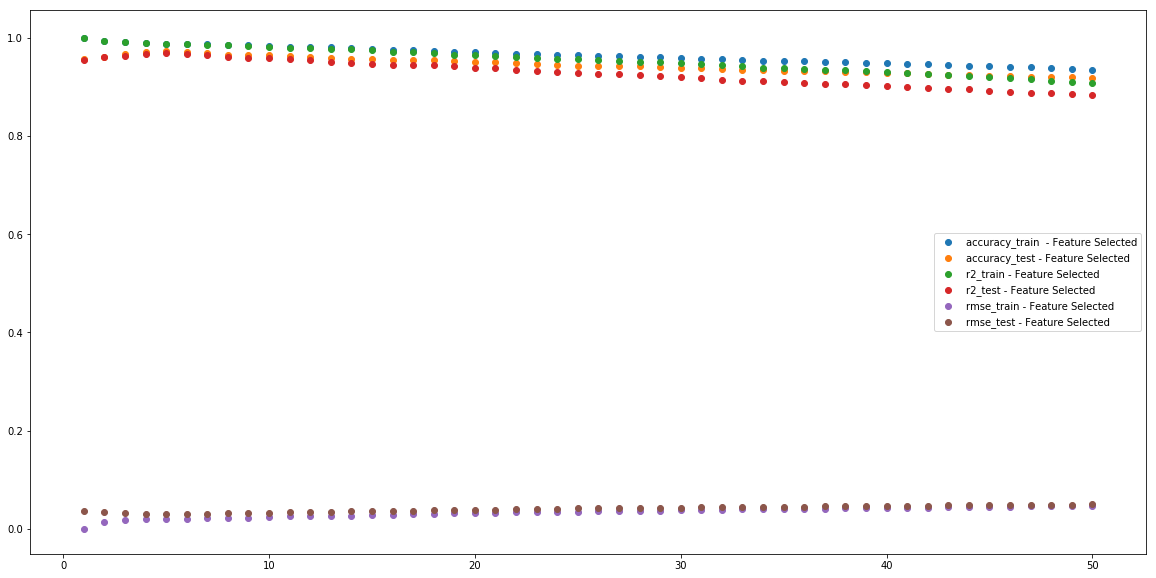

In [71]:
k_values =[]
r2_train1_values =[]
r2_test1_values =[]
rmse_train1_values = []
rmse_test1_values =[]
accuracy_test1 =[]
accuracy_train1 =[]


import math

for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto', p =3)
    model = knn.fit(x1_train, y1_train) 
    y_pred1 = model.predict(x1_test)
    k_values.append(k)
    r2_train1_values.append(metrics.r2_score(model.predict(x1_train), y1_train))
    r2_test1_values.append(metrics.r2_score(model.predict(x1_test), y1_test))
    rmse_train1_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x1_train), y1_train)))
    rmse_test1_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x1_test), y1_test)))
    accuracy_train1.append(model.score(x1_train, y1_train))
    accuracy_test1.append(model.score(x1_test, y1_test))

plt.figure(figsize = (20,10))

plt.scatter(k_values, accuracy_train1, label = 'accuracy_train  - Feature Selected')
plt.scatter(k_values, accuracy_test1, label = 'accuracy_test - Feature Selected')

plt.scatter(k_values, r2_train1_values, label = 'r2_train - Feature Selected')
plt.scatter(k_values, r2_test1_values, label = 'r2_test - Feature Selected')

plt.scatter(k_values, rmse_train1_values, label = 'rmse_train - Feature Selected')
plt.scatter(k_values, rmse_test1_values, label = 'rmse_test - Feature Selected')

plt.legend()
plt.show()

# Validate Model

In [72]:
# Validate Base Model

cv_scores_euclid =[]
cv_scores_manhattan =[]
cv_scores_minkowski =[]

k_values =[]

for k in range(1, 51):
    
    k_values.append(k)
    
    knn_euclid = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto')
    scores = cross_val_score(knn_euclid, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores_euclid.append(scores.mean())
    
    knn_manhattan = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto', p = 1 )
    scores = cross_val_score(knn_manhattan, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores_manhattan.append(scores.mean())
    
    knn_minkowski = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto', p = 3)
    scores = cross_val_score(knn_minkowski, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores_minkowski.append(scores.mean())
 

In [73]:
# Validate Feature Selected Model
cv_scores1_euclid =[]
cv_scores1_manhattan =[]
cv_scores1_minkowski =[]

for k in range(1, 51):
         
    knn1_euclid = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto')
    scores = cross_val_score(knn1_euclid, x1_train , y1_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores1_euclid.append(scores.mean())
    
    knn1_manhattan = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto', p = 1 )
    scores = cross_val_score(knn1_manhattan, x1_train , y1_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores1_manhattan.append(scores.mean())
    
    knn1_minkowski = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto', p = 3)
    scores = cross_val_score(knn1_minkowski, x1_train , y1_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores1_minkowski.append(scores.mean())
 

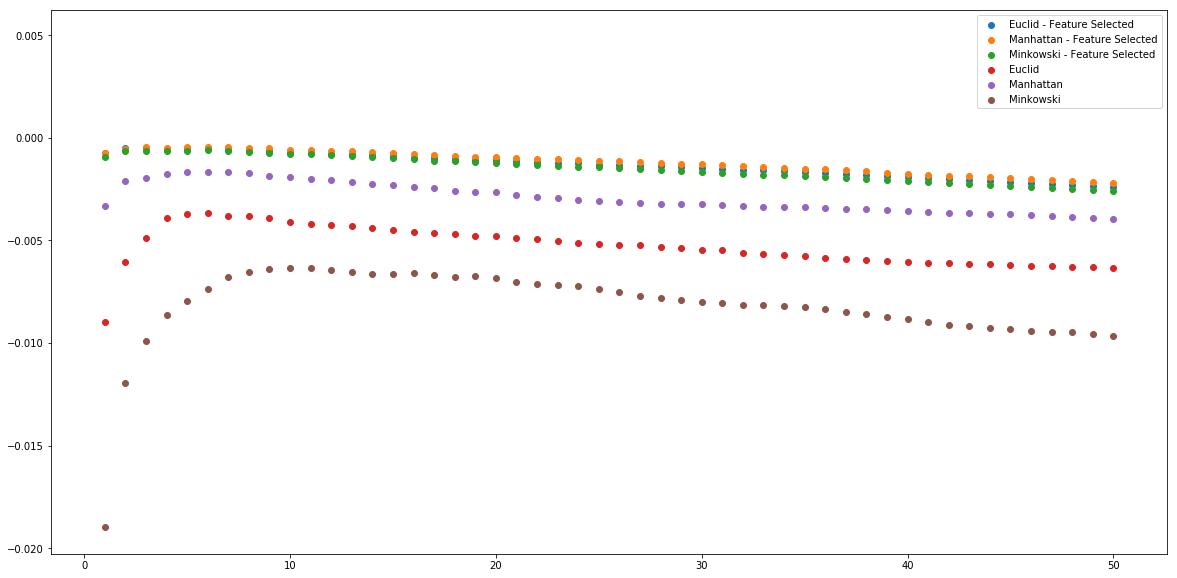

In [74]:
plt.figure(figsize = (20,10))

plt.scatter(k_values,cv_scores1_euclid, label = 'Euclid - Feature Selected')
plt.scatter(k_values,cv_scores1_manhattan, label = 'Manhattan - Feature Selected')
plt.scatter(k_values,cv_scores1_minkowski, label = 'Minkowski - Feature Selected')

plt.scatter(k_values,cv_scores_euclid, label = 'Euclid')
plt.scatter(k_values,cv_scores_manhattan, label = 'Manhattan')
plt.scatter(k_values,cv_scores_minkowski, label = 'Minkowski')

plt.legend()
plt.show()


***The CV score for different distance measures are better for feature selected models***

# Compare Performance Metrics of Different Models  - Euclidean Distance based Models 

In [75]:
# Base Model

k_values =[]
r2_train_values =[]
r2_test_values =[]
rmse_train_values = []
rmse_test_values =[]
accuracy_test =[]
accuracy_train =[]

import math

for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto')
    model = knn.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    k_values.append(k)
    r2_train_values.append(metrics.r2_score(model.predict(x_train), y_train))
    r2_test_values.append(metrics.r2_score(model.predict(x_test), y_test))
    rmse_train_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x_train), y_train)))
    rmse_test_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x_test), y_test)))
    accuracy_train.append(model.score(x_train, y_train))
    accuracy_test.append(model.score(x_test, y_test))

In [76]:
# Features Selected Model

k_values =[]
r2_train1_values =[]
r2_test1_values =[]
rmse_train1_values = []
rmse_test1_values =[]
accuracy_test1 =[]
accuracy_train1 =[]


import math

for k in range(1,51):
    knn = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto')
    model = knn.fit(x1_train, y1_train) 
    y_pred1 = model.predict(x1_test)
    k_values.append(k)
    r2_train1_values.append(metrics.r2_score(model.predict(x1_train), y1_train))
    r2_test1_values.append(metrics.r2_score(model.predict(x1_test), y1_test))
    rmse_train1_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x1_train), y1_train)))
    rmse_test1_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x1_test), y1_test)))
    accuracy_train1.append(model.score(x1_train, y1_train))
    accuracy_test1.append(model.score(x1_test, y1_test))


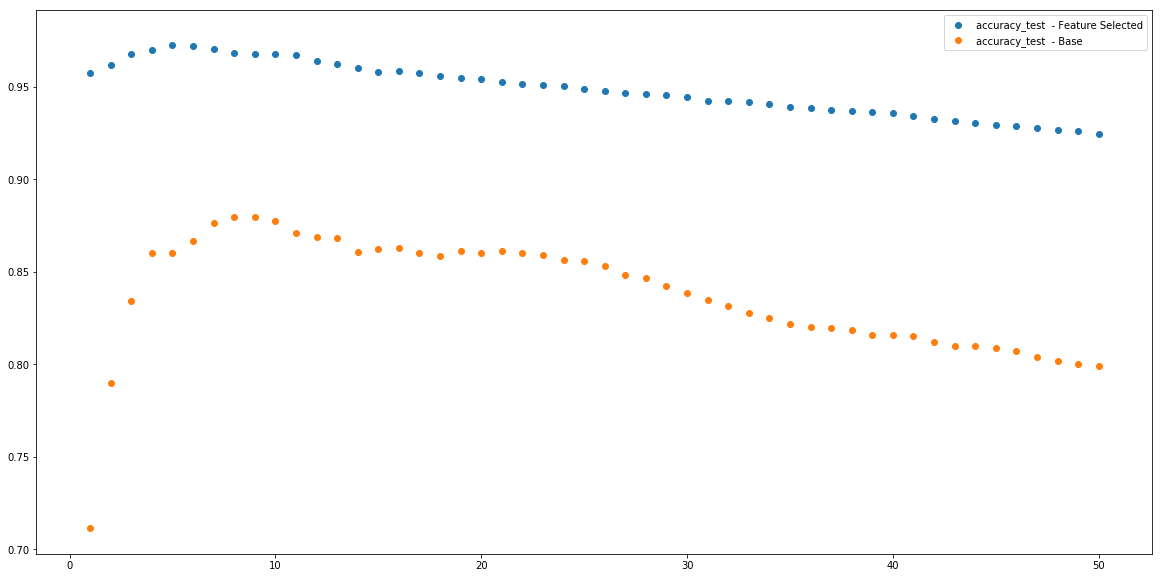

In [77]:
plt.figure(figsize = (20,10))

plt.scatter(k_values, accuracy_test1, label = 'accuracy_test  - Feature Selected')
plt.scatter(k_values, accuracy_test , label = 'accuracy_test  - Base')

plt.legend()
plt.show()

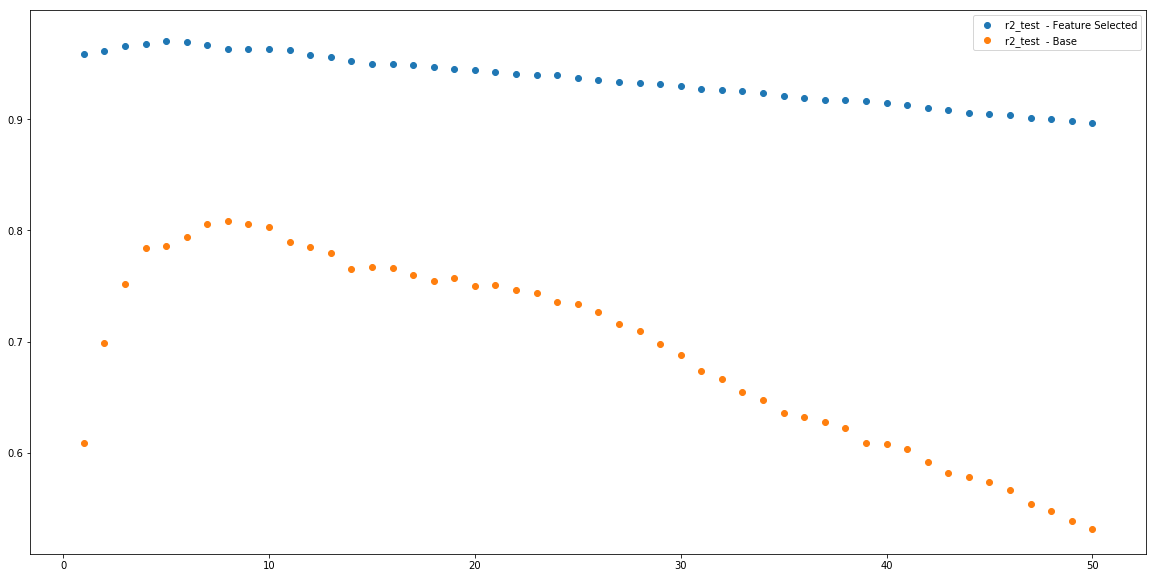

In [78]:
plt.figure(figsize = (20,10))

plt.scatter(k_values, r2_test1_values,label = 'r2_test  - Feature Selected')
plt.scatter(k_values, r2_test_values, label = 'r2_test  - Base')

plt.legend()
plt.show()

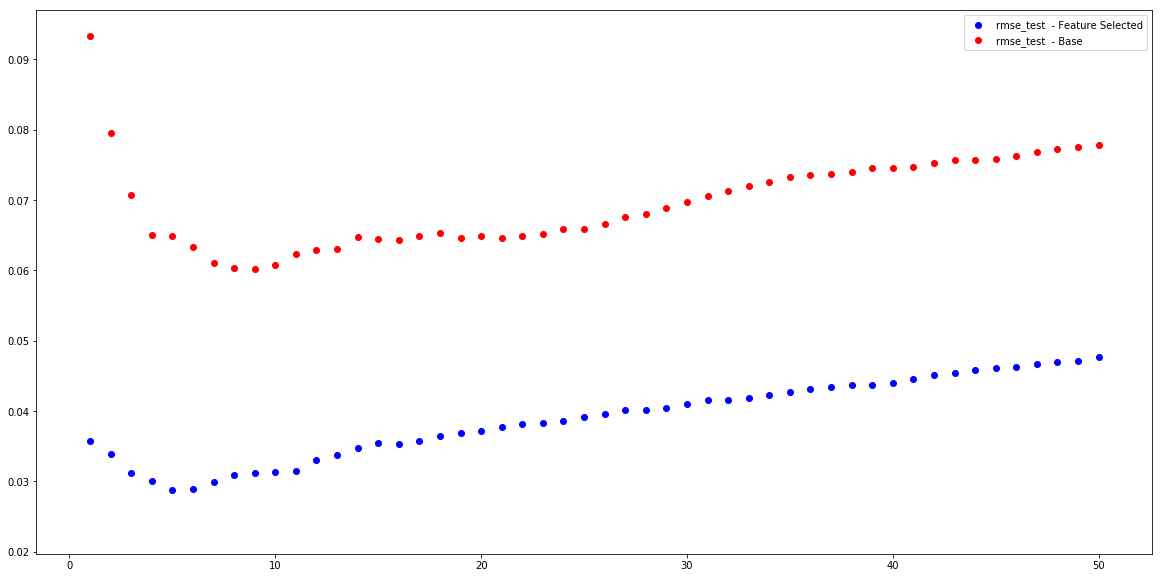

In [79]:
plt.figure(figsize = (20,10))

plt.scatter(k_values, rmse_test1_values, c ='blue', label = 'rmse_test  - Feature Selected')
plt.scatter(k_values, rmse_test_values,  c ='red', label = 'rmse_test  - Base')

plt.legend()
plt.show()

***Models with k = 4,5,6 provide us with better metrics. So we choose them to select one among them***

In [80]:
knn_4 = KNeighborsRegressor(n_neighbors = 4, weights='uniform', algorithm='auto')
model_4 = knn_4.fit(x1_train, y1_train) 
print('K = 4')
print('-'*60)
print('Accuracy: ', model_4.score(x1_test, y1_test))
print('R2-score: ', metrics.r2_score(model_4.predict(x1_test), y1_test))
print('RMSE: ', math.sqrt(metrics.mean_squared_error(model_4.predict(x1_test), y1_test)))
print( )
print( )

knn_5 = KNeighborsRegressor(n_neighbors = 5, weights='uniform', algorithm='auto')
model_5 = knn_5.fit(x1_train, y1_train) 
print('K = 5')
print('-'*60)
print('Accuracy: ', model_5.score(x1_test, y1_test))
print('R2-score: ', metrics.r2_score(model_5.predict(x1_test), y1_test))
print('RMSE: ', math.sqrt(metrics.mean_squared_error(model_5.predict(x1_test), y1_test)))
print( )
print( )


knn_6 = KNeighborsRegressor(n_neighbors = 6, weights='uniform', algorithm='auto')
model_6 = knn_6.fit(x1_train, y1_train) 
print('K = 6')
print('-'*60)
print('Accuracy: ', model_6.score(x1_test, y1_test))
print('R2-score: ', metrics.r2_score(model_6.predict(x1_test), y1_test))
print('RMSE: ', math.sqrt(metrics.mean_squared_error(model_6.predict(x1_test), y1_test)))

K = 4
------------------------------------------------------------
Accuracy:  0.9700426175624928
R2-score:  0.9674096259271475
RMSE:  0.030045767445075706


K = 5
------------------------------------------------------------
Accuracy:  0.9725742016484412
R2-score:  0.9701217832795495
RMSE:  0.028748223256685614


K = 6
------------------------------------------------------------
Accuracy:  0.9722063666627798
R2-score:  0.9689564498971895
RMSE:  0.028940366823365638


***The feature selected model (for k = 5) performs better for better than the base model. So this should be the model we choose to deploy***

# Choose the model for deployment

***Therefore the model we choose to deploy should have:***
    - k = 5,
    - test size = 0.3 or 30% of dataset and random_state = 100
    - training features = ['fg', 'fga', 'ft', 'fta', 'mp', 'tov', 'ft.', 'ast']   
    - Distance Metric = Euclidean Distance

In [81]:
# Saving the the chosen model in the pickle object
chosen_model = pickle.dumps(knn_5)

In [82]:
#To Load:
pickle.loads(chosen_model)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')